# Section 1: Performing Data Cleaning, Data Preparation, Correlation Analysis, Followed by Modeling for Predicting CO2 Emissions      

# Data source: https: https://github.com/owid/co2-data?tab=readme-ov-file
# The CO2 Data repository by Our World in Data provides extensive datasets on carbon dioxide emissions, detailing global and country-specific statistics. It includes historical emissions data, per capita emissions, fossil fuel consumption, and CO2 emissions from land use changes. The repository is designed for analysis and visualization, facilitating research on climate change and policy implications. 

# Additional Data source: https: https://climateactiontracker.org/countries/usa/#:~:text=See%20full%20summary%20of%20policies%20and%20actions%20here.&text=We%20rate%20the%20US%20domestic,to%20modelled%20domestic%20emissions%20pathways

# The Climate Action Tracker provides an analysis of the United States' climate policies and their effectiveness in reducing greenhouse gas emissions. It provides the country's domestic actions against global climate targets set in Paris agreement. The site emphasizes the importance of modeling domestic emissions pathways to assess alignment with climate goals.


## Subsection 1.1 : Data Import and Initial Exploration
Description: This block imports necessary libraries and reads the initial CSV data file to set up the DataFrame for analysis.

In [1]:
import pandas as pd

# Import the CSV file
df = pd.read_csv('owid-co2-data.csv')

# Print the columns
print("Columns in the DataFrame:", df.columns.tolist())

# Print the length of the data frame
print(len(df))

# The data is time series data provided year wise

Columns in the DataFrame: ['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'n

## Subsection 1.2 : Data Preparation: USA
Description: This block filters and prepares data specifically for the USA to build models for forecasting and analysis.

Length of US data before removing NaNs: (203, 8)
Length of US data after removing NaNs: (203, 8)
US Population growth rate: 1.76% per year
US GDP growth rate: 3.32% per year


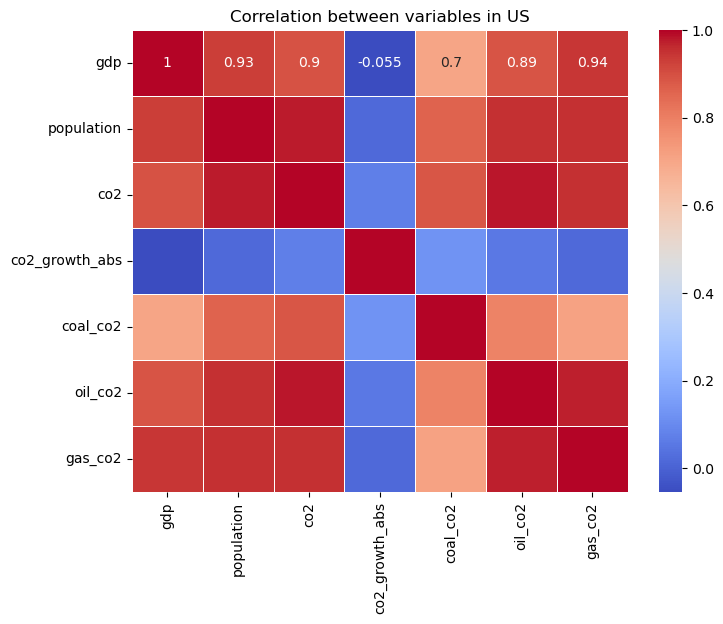

In [2]:
# Prepare USA data for model buildup
import numpy as np

# Filter the DataFrame for the US and years from 1820
us_data = df[(df['country'] == 'United States') & (df['year'] >= 1820)]

us_selected_columns = ['year','gdp', 'population', 'co2', 'co2_growth_abs', 'coal_co2', 'oil_co2', 'gas_co2']
us_data = us_data[us_selected_columns]

# Check the length of the original US data
print("Length of US data before removing NaNs:", np.shape(us_data))

# Select numerical columns to apply the moving average
us_numerical_cols = us_data.select_dtypes(include='number').columns

# Fill NaN values with the moving average of the last 5 observations in US data
us_data[us_numerical_cols] = us_data[us_numerical_cols].fillna(us_data[us_numerical_cols].rolling(window=5).mean())

# Remove rows with any null or NaN values in US data
us_data.dropna(inplace=True)

# Reset the index for US data
us_data.reset_index(drop=True, inplace=True)

# Check the length of the original US data
print("Length of US data after removing NaNs:", np.shape(us_data))

# Check the length of the processed US data
#print("Length of processed US data:", len(us_data))
#print(us_data['co2'])

# Extract the starting and ending years for US
start_year_us = us_data['year'].iloc[0]
end_year_us = us_data['year'].iloc[-1]
num_years_us = end_year_us - start_year_us

# Extract the starting and ending values for US population and GDP
start_population_us = us_data['population'].iloc[0]
end_population_us = us_data['population'].iloc[-1]
start_gdp_us = us_data['gdp'].iloc[0]
end_gdp_us = us_data['gdp'].iloc[-1]

# Calculate the compound annual growth rate (CAGR) for US population
population_cagr_us = (end_population_us / start_population_us) ** (1 / num_years_us) - 1

# Calculate the compound annual growth rate (CAGR) for US GDP
gdp_cagr_us = (end_gdp_us / start_gdp_us) ** (1 / num_years_us) - 1

# Convert the US CAGR to percentage format for readability
population_growth_rate_us = population_cagr_us * 100
gdp_growth_rate_us = gdp_cagr_us * 100

# Print the results for the US
print(f"US Population growth rate: {population_growth_rate_us:.2f}% per year")
print(f"US GDP growth rate: {gdp_growth_rate_us:.2f}% per year")

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for the selected numerical columns
corr_matrix = us_data[['gdp', 'population', 'co2', 'co2_growth_abs', 'coal_co2', 'oil_co2', 'gas_co2']].corr()

# Plot the heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between variables in US')
plt.show()


## Subsection 1.3 : Data Preparation: Canada
Description: Similar to the USA, this section prepares data for Canada from the specified year range for subsequent analysis.

Length of Canada data before removing NaNs: (153, 8)
Length of Canada data after removing NaNs: (153, 8)
Canada Population growth rate: 1.54% per year
Canada GDP growth rate: 3.45% per year


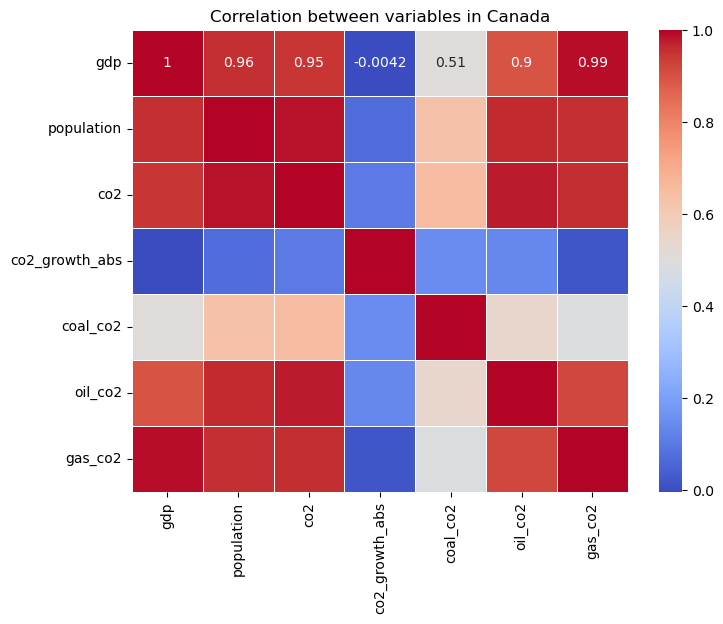

In [3]:
# Prepare Canada data for model buildup
# Filter the DataFrame for Canada and years from 1870
canada_data = df[(df['country'] == 'Canada') & (df['year'] >= 1870)]

canada_selected_columns = ['year', 'gdp', 'population', 'co2', 'co2_growth_abs', 'coal_co2', 'oil_co2', 'gas_co2']
canada_data = canada_data[canada_selected_columns]

# Check the length of the original Canada data
print("Length of Canada data before removing NaNs:", np.shape(canada_data))

# Select numerical columns to apply the moving average
canada_numerical_cols = canada_data.select_dtypes(include='number').columns

# Fill NaN values with the moving average of the last 5 observations in Canada data
canada_data[canada_numerical_cols] = canada_data[canada_numerical_cols].fillna(canada_data[canada_numerical_cols].rolling(window=5).mean())

# Remove rows with any null or NaN values in Canada data
canada_data.dropna(inplace=True)

# Reset the index for Canada data
canada_data.reset_index(drop=True, inplace=True)

# Check the length of the original Canada data
print("Length of Canada data after removing NaNs:", np.shape(canada_data))
# Check the length of the processed Canada data
#print("Length of processed Canada data:", len(canada_data))
#print(canada_data[['year', 'co2']])

# Extract the starting and ending years
start_year = canada_data['year'].iloc[0]
end_year = canada_data['year'].iloc[-1]
num_years = end_year - start_year

# Extract the starting and ending values for population and GDP
start_population = canada_data['population'].iloc[0]
end_population = canada_data['population'].iloc[-1]
start_gdp = canada_data['gdp'].iloc[0]
end_gdp = canada_data['gdp'].iloc[-1]

# Calculate the compound annual growth rate (CAGR) for population
population_cagr_canada = (end_population / start_population) ** (1 / num_years) - 1

# Calculate the compound annual growth rate (CAGR) for GDP
gdp_cagr_canada = (end_gdp / start_gdp) ** (1 / num_years) - 1

# Convert the CAGR to percentage format for better readability
population_growth_rate_canada = population_cagr_canada * 100
gdp_growth_rate_canada = gdp_cagr_canada * 100

# Print the results for Canada
print(f"Canada Population growth rate: {population_growth_rate_canada:.2f}% per year")
print(f"Canada GDP growth rate: {gdp_growth_rate_canada:.2f}% per year")

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for the selected numerical columns
corr_matrix = canada_data[['gdp', 'population', 'co2', 'co2_growth_abs', 'coal_co2', 'oil_co2', 'gas_co2']].corr()

# Plot the heatmap with annotations
plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between variables in Canada')
plt.show()

## Subsection 1.4 : Combining North American Data
Description: Filters and combines data for the USA and Canada, focusing on emissions and other parameters from 1890 onwards.

Length of North America data before removing NaNs: (133, 8)
Length of North America data after removing NaNs: (133, 8)


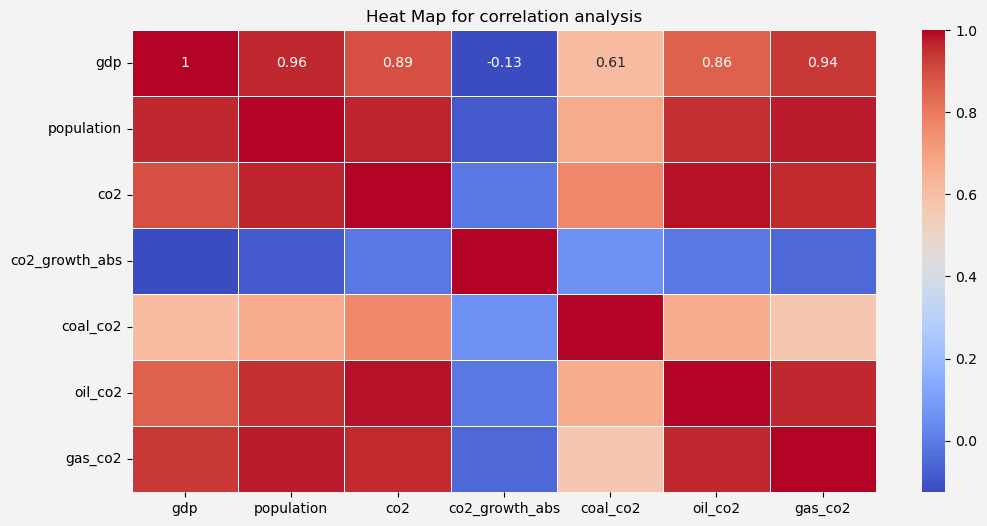

North America Population growth rate: 1.32% per year
North America GDP growth rate: 2.98% per year
North America Coal CO2 growth rate: 0.70% per year
North America Oil CO2 growth rate: 3.80% per year
North America Gas CO2 growth rate: 3.97% per year


In [4]:
# Step 1: Filter the DataFrame for the US and Canada, and years from 1890
north_america_data = df[(df['country'].isin(['United States', 'Canada'])) & (df['year'] >= 1890)]

# Step 2: Select necessary columns and group by year, summing data for the two countries
na_selected_columns = ['year', 'gdp', 'population', 'co2', 'co2_growth_abs', 'coal_co2', 'oil_co2', 'gas_co2']
north_america_data = north_america_data[na_selected_columns]

# Step 3: Aggregate data by summing the columns for each year (combine USA and Canada)
north_america_data = north_america_data.groupby('year').sum().reset_index()

# Step 4: Check the length of the North America data
print("Length of North America data before removing NaNs:", np.shape(north_america_data))

# Step 5: Select numerical columns to apply the moving average
na_numerical_cols = north_america_data.select_dtypes(include='number').columns

# Step 6: Fill NaN values with the moving average of the last 5 observations
north_america_data[na_numerical_cols] = north_america_data[na_numerical_cols].fillna(
    north_america_data[na_numerical_cols].rolling(window=5).mean()
)

# Step 7: Remove rows with any null or NaN values
north_america_data.dropna(inplace=True)

# Step 8: Reset the index
north_america_data.reset_index(drop=True, inplace=True)

# Step 9: Check the length after removing NaNs
print("Length of North America data after removing NaNs:", np.shape(north_america_data))

# Step 10: Calculate the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for the selected numerical columns
corr_matrix_na = north_america_data[['gdp', 'population', 'co2', 'co2_growth_abs', 'coal_co2', 'oil_co2', 'gas_co2']].corr()

# Step 11: Plot the heatmap with annotations
plt.figure(figsize=(12, 6))
# Set background color according to the image (#F3F3F3)
plt.gcf().set_facecolor('#F3F3F3')
sns.heatmap(corr_matrix_na, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heat Map for correlation analysis')
plt.savefig('heatmap.jpg', format='jpg', dpi=400)  # Specify the file name and format

plt.show()

# Extract the starting and ending years for North America
start_year_na = north_america_data['year'].iloc[0]
end_year_na = north_america_data['year'].iloc[-1]
num_years_na = end_year_na - start_year_na

# Extract the starting and ending values for each variable in North America
start_population_na = north_america_data['population'].iloc[0]
end_population_na = north_america_data['population'].iloc[-1]

start_gdp_na = north_america_data['gdp'].iloc[0]
end_gdp_na = north_america_data['gdp'].iloc[-1]

start_coal_co2_na = north_america_data['coal_co2'].iloc[0]
end_coal_co2_na = north_america_data['coal_co2'].iloc[-1]

start_oil_co2_na = north_america_data['oil_co2'].iloc[0]
end_oil_co2_na = north_america_data['oil_co2'].iloc[-1]

start_gas_co2_na = north_america_data['gas_co2'].iloc[0]
end_gas_co2_na = north_america_data['gas_co2'].iloc[-1]

# Calculate the compound annual growth rate (CAGR) for each variable
def calculate_cagr(start_value, end_value, num_years):
    return (end_value / start_value) ** (1 / num_years) - 1

# Population CAGR
population_cagr_na = calculate_cagr(start_population_na, end_population_na, num_years_na)

# GDP CAGR
gdp_cagr_na = calculate_cagr(start_gdp_na, end_gdp_na, num_years_na)

# Coal CO2 CAGR
coal_co2_cagr_na = calculate_cagr(start_coal_co2_na, end_coal_co2_na, num_years_na)

# Oil CO2 CAGR
oil_co2_cagr_na = calculate_cagr(start_oil_co2_na, end_oil_co2_na, num_years_na)

# Gas CO2 CAGR
gas_co2_cagr_na = calculate_cagr(start_gas_co2_na, end_gas_co2_na, num_years_na)

# Convert the CAGR to percentage format for readability
population_growth_rate_na = population_cagr_na * 100
gdp_growth_rate_na = gdp_cagr_na * 100
coal_co2_growth_rate_na = coal_co2_cagr_na * 100
oil_co2_growth_rate_na = oil_co2_cagr_na * 100
gas_co2_growth_rate_na = gas_co2_cagr_na * 100

# Print the results for North America
print(f"North America Population growth rate: {population_growth_rate_na:.2f}% per year")
print(f"North America GDP growth rate: {gdp_growth_rate_na:.2f}% per year")
print(f"North America Coal CO2 growth rate: {coal_co2_growth_rate_na:.2f}% per year")
print(f"North America Oil CO2 growth rate: {oil_co2_growth_rate_na:.2f}% per year")
print(f"North America Gas CO2 growth rate: {gas_co2_growth_rate_na:.2f}% per year")


### Results: The plot shows the correlation of CO2 emissions with important variable.

## Subsection 1.5: Import Paris Agreement Data
Description: Loads additional data related to the Paris Agreement for the USA, which will be used to compare emissions against targets.

In [5]:
# Load the Excel file : Paris Agreement target data
file_path = '202311_CAT_AssessmentData_USA.xlsx'

# Load all sheets (returns a dictionary of DataFrames)
all_sheets = pd.read_excel(file_path, sheet_name=None)

# Load a specific sheet by name or index
df_specific_sheet = pd.read_excel(file_path, sheet_name='Data_plot')  # by sheet name


## Subsection *: Model Build up
Description: Hmm. This is a tricky and agile process. I have not seen any model works at the first time itself. Rather I tried many, worked one. Feel Free to explore the models.

In [6]:
# US CO2 emission models with two inputs GDP and Population
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Assuming 'us_data' contains 'gdp', 'population', 'co2', and 'year' columns
# X = us_data[['gdp', 'population']]
# y = us_data['co2']
# years = us_data['year']

# # Step 1: Standardize the input features
# scaler_X = MinMaxScaler()  # Normalize the features
# X_scaled = scaler_X.fit_transform(X)

# # Normalize the target variable y
# scaler_y = MinMaxScaler()  # Normalize the target
# y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()  # Reshape for MinMaxScaler

# # Convert the standardized features back into a DataFrame with the original index (year)
# X_scaled_df = pd.DataFrame(X_scaled, index=us_data.index, columns=['gdp', 'population'])

# # Step 2: Split the data into training and testing sets (90% train, 10% test)
# train_size = int(len(X_scaled_df) * 1.0)
# train_size1 = int(len(X_scaled_df) * 0.9)
# X_train, X_test = X_scaled_df.iloc[:train_size], X_scaled_df.iloc[train_size1:]
# y_train, y_test = y_scaled[:train_size], y_scaled[train_size1:]
# years_train, years_test = years.iloc[:train_size], years.iloc[train_size1:]

# # Step 3: Fit the ARIMAX model
# arimax_model = SARIMAX(y_train, exog=X_train, order=(2, 2, 2)).fit()

# # Step 4: Make predictions on the train and test data
# y_pred_train_scaled = arimax_model.predict(start=0, end=len(y_train) - 1, exog=X_train)
# y_pred_test_scaled = arimax_model.predict(start=train_size1, end=train_size1 + len(y_test) - 1, exog=X_test)

# # Step 5: Denormalize predictions back to the original CO2 scale using inverse_transform
# # Convert predictions from Series to NumPy arrays and reshape them
# y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.values.reshape(-1, 1)).flatten()
# y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.values.reshape(-1, 1)).flatten()

# # Prepare for future predictions (2023 to 2030)
# future_years = pd.Series(range(2023, 2031))

# # Assuming increasing population and decreasing GDP for future years
# np.random.seed(0)  # For reproducibility

# # Generate future population and GDP with added noise
# future_population = []
# future_gdp = []

# last_population = X['population'].iloc[-1]
# last_gdp = X['gdp'].iloc[-1]

# for i, year in enumerate(future_years):
#     population_with_noise = last_population * (1.00 + population_growth_rate_us/100 * (i / len(future_years))) + np.random.normal(0, 0.01 * last_population)
#     gdp_with_noise = last_gdp * (1.00 + gdp_growth_rate_us/100 * (i / len(future_years))) + np.random.normal(0, 0.01 * last_gdp)
#     future_population.append(population_with_noise)
#     future_gdp.append(gdp_with_noise)

# future_population = np.array(future_population)
# future_gdp = np.array(future_gdp)

# # Standardize the future population and GDP using the same scaler
# future_X_scaled = scaler_X.transform(np.column_stack([future_gdp, future_population]))
# future_X_scaled_df = pd.DataFrame(future_X_scaled, index=future_years, columns=['gdp', 'population'])

# # Step 6: Predict future values with 95% confidence intervals
# forecast_result = arimax_model.get_forecast(steps=len(future_years), exog=future_X_scaled_df)
# y_pred_future_scaled = forecast_result.predicted_mean
# y_pred_future = scaler_y.inverse_transform(y_pred_future_scaled.values.reshape(-1, 1)).flatten()

# # Extract confidence intervals (90%)
# conf_int = forecast_result.conf_int(alpha=0.1)
# conf_int_lower = scaler_y.inverse_transform(conf_int.iloc[:, 0].values.reshape(-1, 1)).flatten()
# conf_int_upper = scaler_y.inverse_transform(conf_int.iloc[:, 1].values.reshape(-1, 1)).flatten()

# # Step 7: Plot training, test, and future predictions with confidence intervals
# plt.figure(figsize=(12, 6))

# # Plot training data
# plt.plot(years_train, scaler_y.inverse_transform(y_train.reshape(-1, 1)), label='Actual CO2 (Train)', color='blue', marker='o')
# plt.plot(years_train, y_pred_train, label='Predicted CO2 (Train)', color='cyan', linestyle='--')

# # Plot test data
# plt.plot(years_test, scaler_y.inverse_transform(y_test.reshape(-1, 1)), label='Actual CO2 (Test)', color='green', marker='o')
# plt.plot(years_test, y_pred_test, label='Predicted CO2 (Test)', color='red', linestyle='--')

# # Plot future predictions
# plt.plot(future_years, y_pred_future, label='Predicted CO2 (Future)', color='purple', linestyle='--', marker='x')

# # Plot confidence intervals for future predictions
# plt.fill_between(future_years, conf_int_lower, conf_int_upper, color='purple', alpha=0.5, label='90% Confidence Interval')

# # Customize the plot
# plt.title('US CO2 Emissions Prediction (Train, Test, and Future) with 90% Confidence Intervals')
# plt.xlabel('Year')
# plt.ylabel('CO2 Emissions (Mt)')
# plt.legend()
# plt.grid()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# # Plot paris agreement
# plt.figure(figsize=(12, 6))
# plt.plot(years_train, scaler_y.inverse_transform(y_train.reshape(-1, 1)), label='Actual CO2 (Train)', color='blue', marker='o')
# plt.plot(years_train, y_pred_train, label='Predicted CO2 (Train)', color='cyan', linestyle='--')

# # Plot test data
# plt.plot(years_test, scaler_y.inverse_transform(y_test.reshape(-1, 1)), label='Actual CO2 (Test)', color='green', marker='o')
# plt.plot(years_test, y_pred_test, label='Predicted CO2 (Test)', color='red', linestyle='--')

# # Plot future predictions
# plt.plot(future_years, y_pred_future, label='Predicted CO2 (Future)', color='purple', linestyle='--', marker='x')

# # Plot confidence intervals for future predictions
# plt.fill_between(future_years, conf_int_lower, conf_int_upper, color='purple', alpha=0.5, label='90% Confidence Interval')

# # Plot df_specific_sheet data
# plt.plot(df_specific_sheet['Upper end of '], df_specific_sheet['1.5°C Paris Agreement compatible US'], label='Paris Agreement Target', color='orange', linestyle='-', marker='s')

# # Customize the plot
# plt.title('US CO2 Emissions Prediction (Train, Test, and Future) with 95% Confidence Intervals & Paris Agreement')
# plt.xlabel('Year')
# plt.ylabel('CO2 Emissions (Mt)')
# plt.legend()
# plt.grid()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [7]:
# US CO2 emission models with 3 inputs CO2 emited from Gas combustion, GDP and Population 
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Assuming 'us_data' contains 'gdp', 'population', 'co2', 'oil_co2', and 'year' columns
# X = us_data[['gdp', 'population', 'oil_co2']]  # Include 'oil_co2' as an additional feature
# y = us_data['co2']
# years = us_data['year']

# # Step 1: Standardize the input features
# scaler_X = MinMaxScaler()  # Normalize the features
# X_scaled = scaler_X.fit_transform(X)

# # Normalize the target variable y
# scaler_y = MinMaxScaler()  # Normalize the target
# y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()  # Reshape for MinMaxScaler

# # Convert the standardized features back into a DataFrame with the original index (year)
# X_scaled_df = pd.DataFrame(X_scaled, index=us_data.index, columns=['gdp', 'population', 'oil_co2'])

# # Step 2: Split the data into training and testing sets (90% train, 10% test)
# train_size = int(len(X_scaled_df) * 1.0)
# train_size1 = int(len(X_scaled_df) * 0.9)
# X_train, X_test = X_scaled_df.iloc[:train_size], X_scaled_df.iloc[train_size1:]
# y_train, y_test = y_scaled[:train_size], y_scaled[train_size1:]
# years_train, years_test = years.iloc[:train_size], years.iloc[train_size1:]

# # Step 3: Fit the ARIMAX model
# arimax_model = SARIMAX(y_train, exog=X_train, order=(2, 2, 2)).fit()

# # Step 4: Make predictions on the train and test data
# y_pred_train_scaled = arimax_model.predict(start=0, end=len(y_train) - 1, exog=X_train)
# y_pred_test_scaled = arimax_model.predict(start=train_size1, end=train_size1 + len(y_test) - 1, exog=X_test)

# # Step 5: Denormalize predictions back to the original CO2 scale using inverse_transform
# # Convert predictions from Series to NumPy arrays and reshape them
# y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled.values.reshape(-1, 1)).flatten()
# y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.values.reshape(-1, 1)).flatten()

# # Prepare for future predictions (2023 to 2050)
# future_years = pd.Series(range(2023, 2051))

# # Assuming increasing population and decreasing GDP for future years
# np.random.seed(0)  # For reproducibility

# # Generate future population and GDP with added noise
# future_population = []
# future_gdp = []
# future_oil_co2 = []  # Future oil CO2 values

# last_population = X['population'].iloc[-1]
# last_gdp = X['gdp'].iloc[-1]
# last_oil_co2 = X['oil_co2'].iloc[-1]

# for i, year in enumerate(future_years):
#     population_with_noise = last_population * (1.00 + population_growth_rate_us / 100 * (i / len(future_years))) + np.random.normal(0, 0.001 * last_population)
#     gdp_with_noise = last_gdp * (1.00 + gdp_growth_rate_us / 100 * (i / len(future_years))) + np.random.normal(0, 0.001 * last_gdp)
#     oil_co2_with_noise = last_oil_co2 * (1.00 + 0.05 * (i / len(future_years))) + np.random.normal(0, 0.001 * last_oil_co2)
#     future_population.append(population_with_noise)
#     future_gdp.append(gdp_with_noise)
#     future_oil_co2.append(oil_co2_with_noise)

# future_population = np.array(future_population)
# future_gdp = np.array(future_gdp)
# future_oil_co2 = np.array(future_oil_co2)

# # Standardize the future population, GDP, and oil_co2 using the same scaler
# future_X_scaled = scaler_X.transform(np.column_stack([future_gdp, future_population, future_oil_co2]))
# future_X_scaled_df = pd.DataFrame(future_X_scaled, index=future_years, columns=['gdp', 'population', 'oil_co2'])

# # Step 6: Predict future values with 95% confidence intervals
# forecast_result = arimax_model.get_forecast(steps=len(future_years), exog=future_X_scaled_df)
# y_pred_future_scaled = forecast_result.predicted_mean
# y_pred_future = scaler_y.inverse_transform(y_pred_future_scaled.values.reshape(-1, 1)).flatten()

# # Extract confidence intervals (95%)
# conf_int = forecast_result.conf_int(alpha=0.05)
# conf_int_lower = scaler_y.inverse_transform(conf_int.iloc[:, 0].values.reshape(-1, 1)).flatten()
# conf_int_upper = scaler_y.inverse_transform(conf_int.iloc[:, 1].values.reshape(-1, 1)).flatten()

# # Step 7: Plot training, test, and future predictions with confidence intervals
# plt.figure(figsize=(12, 6))

# # Plot training data
# plt.plot(years_train, scaler_y.inverse_transform(y_train.reshape(-1, 1)), label='Actual CO2 (Train)', color='blue', marker='o')
# plt.plot(years_train, y_pred_train, label='Predicted CO2 (Train)', color='cyan', linestyle='--')

# # Plot test data
# plt.plot(years_test, scaler_y.inverse_transform(y_test.reshape(-1, 1)), label='Actual CO2 (Test)', color='green', marker='o')
# plt.plot(years_test, y_pred_test, label='Predicted CO2 (Test)', color='red', linestyle='--')

# # Plot future predictions
# plt.plot(future_years, y_pred_future, label='Predicted CO2 (Future)', color='purple', linestyle='--', marker='x')

# # Plot confidence intervals for future predictions
# plt.fill_between(future_years, conf_int_lower, conf_int_upper, color='purple', alpha=0.5, label='95% Confidence Interval')

# # Customize the plot
# plt.title('US CO2 Emissions Prediction (Train, Test, and Future) with 95% Confidence Intervals')
# plt.xlabel('Year')
# plt.ylabel('CO2 Emissions (Mt)')
# plt.legend()
# plt.grid()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# # Plot with Paris Agreement
# plt.figure(figsize=(12, 6))
# plt.plot(years_train, scaler_y.inverse_transform(y_train.reshape(-1, 1)), label='Actual CO2 (Train)', color='blue', marker='o')
# plt.plot(years_train, y_pred_train, label='Predicted CO2 (Train)', color='cyan', linestyle='--')

# # Plot test data
# plt.plot(years_test, scaler_y.inverse_transform(y_test.reshape(-1, 1)), label='Actual CO2 (Test)', color='green', marker='o')
# plt.plot(years_test, y_pred_test, label='Predicted CO2 (Test)', color='red', linestyle='--')

# # Plot future predictions
# plt.plot(future_years, y_pred_future, label='Predicted CO2 (Future)', color='purple', linestyle='--', marker='x')

# # Plot confidence intervals for future predictions
# plt.fill_between(future_years, conf_int_lower, conf_int_upper, color='purple', alpha=0.5, label='95% Confidence Interval')

# # Plot df_specific_sheet data for the Paris Agreement target
# # Ensure that df_specific_sheet has the required columns
# plt.plot(df_specific_sheet['Upper end of '], df_specific_sheet['1.5°C Paris Agreement compatible US'], label='Paris Agreement Target', color='orange', linestyle='-', marker='s')

# # Customize the plot
# plt.title('US CO2 Emissions Prediction (Train, Test, and Future) with 95% Confidence Intervals & Paris Agreement')
# plt.xlabel('Year')
# plt.ylabel('CO2 Emissions (Mt)')
# plt.legend()
# plt.grid()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [8]:
# CANADA CO2 emission models with two inputs GDP and Population
# # Assuming 'canada_data' contains 'gdp', 'population', 'co2', and 'year' columns
# X_canada = canada_data[['gdp', 'population']]
# y_canada = canada_data['co2']
# years_canada = canada_data['year']

# # Step 1: Standardize the input features
# scaler_X_canada = MinMaxScaler()  # Normalize the features
# X_canada_scaled = scaler_X_canada.fit_transform(X_canada)

# # Normalize the target variable y (CO2)
# scaler_y_canada = MinMaxScaler()  # Normalize the target
# y_canada_scaled = scaler_y_canada.fit_transform(y_canada.values.reshape(-1, 1)).flatten()

# # Convert the standardized features back into a DataFrame with the original index (year)
# X_canada_scaled_df = pd.DataFrame(X_canada_scaled, index=canada_data.index, columns=['gdp', 'population'])

# # Step 2: Split the data into training and testing sets (90% train, 10% test)
# train_size_canada = int(len(X_canada_scaled_df) * 1.0)
# train_size1_canada = int(len(X_canada_scaled_df) * 0.9)
# X_canada_train, X_canada_test = X_canada_scaled_df.iloc[:train_size_canada], X_canada_scaled_df.iloc[train_size1_canada:]
# y_canada_train, y_canada_test = y_canada_scaled[:train_size_canada], y_canada_scaled[train_size1_canada:]
# years_canada_train, years_canada_test = years_canada.iloc[:train_size_canada], years_canada.iloc[train_size1_canada:]

# # Step 3: Fit the ARIMAX model
# arimax_model_canada = SARIMAX(y_canada_train, exog=X_canada_train, order=(2, 2, 2)).fit()

# # Step 4: Make predictions on the train and test data
# y_pred_train_canada_scaled = arimax_model_canada.predict(start=0, end=len(y_canada_train) - 1, exog=X_canada_train)
# y_pred_test_canada_scaled = arimax_model_canada.predict(start=train_size1_canada, end=train_size1_canada + len(y_canada_test) - 1, exog=X_canada_test)

# # Step 5: Denormalize predictions back to the original CO2 scale using inverse_transform
# y_pred_train_canada = scaler_y_canada.inverse_transform(y_pred_train_canada_scaled.values.reshape(-1, 1)).flatten()
# y_pred_test_canada = scaler_y_canada.inverse_transform(y_pred_test_canada_scaled.values.reshape(-1, 1)).flatten()

# # Prepare for future predictions (2023 to 2030)
# future_years_canada = pd.Series(range(2023, 2031))

# # Assuming increasing population and decreasing GDP for future years in Canada
# np.random.seed(0)  # For reproducibility

# # Generate future population and GDP with added noise for Canada
# future_population_canada = []
# future_gdp_canada = []

# last_population_canada = X_canada['population'].iloc[-1]
# last_gdp_canada = X_canada['gdp'].iloc[-1]

# for i, year in enumerate(future_years_canada):
#     population_with_noise_canada = last_population_canada * (1.00 + population_growth_rate_canada/100 * (i / len(future_years_canada))) + np.random.normal(0, 0.01 * last_population_canada)
#     gdp_with_noise_canada = last_gdp_canada * (1.00 + gdp_growth_rate_canada/100 * (i / len(future_years_canada))) + np.random.normal(0, 0.01 * last_gdp_canada)
#     future_population_canada.append(population_with_noise_canada)
#     future_gdp_canada.append(gdp_with_noise_canada)

# future_population_canada = np.array(future_population_canada)
# future_gdp_canada = np.array(future_gdp_canada)

# # Standardize the future population and GDP using the same scaler
# future_X_canada_scaled = scaler_X_canada.transform(np.column_stack([future_gdp_canada, future_population_canada]))
# future_X_canada_scaled_df = pd.DataFrame(future_X_canada_scaled, index=future_years_canada, columns=['gdp', 'population'])

# # Step 6: Predict future values with 95% confidence intervals
# forecast_result_canada = arimax_model_canada.get_forecast(steps=len(future_years_canada), exog=future_X_canada_scaled_df)
# y_pred_future_canada_scaled = forecast_result_canada.predicted_mean
# y_pred_future_canada = scaler_y_canada.inverse_transform(y_pred_future_canada_scaled.values.reshape(-1, 1)).flatten()

# # Extract confidence intervals (90%) for Canada
# conf_int_canada = forecast_result_canada.conf_int(alpha=0.1)
# conf_int_lower_canada = scaler_y_canada.inverse_transform(conf_int_canada.iloc[:, 0].values.reshape(-1, 1)).flatten()
# conf_int_upper_canada = scaler_y_canada.inverse_transform(conf_int_canada.iloc[:, 1].values.reshape(-1, 1)).flatten()

# # Step 7: Plot training, test, and future predictions with confidence intervals for Canada
# plt.figure(figsize=(12, 6))

# # Plot training data
# plt.plot(years_canada_train, scaler_y_canada.inverse_transform(y_canada_train.reshape(-1, 1)), label='Actual CO2 (Train)', color='blue', marker='o')
# plt.plot(years_canada_train, y_pred_train_canada, label='Predicted CO2 (Train)', color='cyan', linestyle='--')

# # Plot test data
# plt.plot(years_canada_test, scaler_y_canada.inverse_transform(y_canada_test.reshape(-1, 1)), label='Actual CO2 (Test)', color='green', marker='o')
# plt.plot(years_canada_test, y_pred_test_canada, label='Predicted CO2 (Test)', color='red', linestyle='--')

# # Plot future predictions
# plt.plot(future_years_canada, y_pred_future_canada, label='Predicted CO2 (Future)', color='purple', linestyle='--', marker='x')

# # Plot confidence intervals for future predictions
# plt.fill_between(future_years_canada, conf_int_lower_canada, conf_int_upper_canada, color='purple', alpha=0.5, label='90% Confidence Interval')

# # Customize the plot for Canada
# plt.title('Canada CO2 Emissions Prediction (Train, Test, and Future) with 90% Confidence Intervals')
# plt.xlabel('Year')
# plt.ylabel('CO2 Emissions (Mt)')
# plt.legend()
# plt.grid()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# # Plot Canada Paris Agreement target and CO2 prediction
# plt.figure(figsize=(12, 6))

# # Plot training data
# plt.plot(years_canada_train, scaler_y_canada.inverse_transform(y_canada_train.reshape(-1, 1)), label='Actual CO2 (Train)', color='blue', marker='o')
# plt.plot(years_canada_train, y_pred_train_canada, label='Predicted CO2 (Train)', color='cyan', linestyle='--')

# # Plot test data
# plt.plot(years_canada_test, scaler_y_canada.inverse_transform(y_canada_test.reshape(-1, 1)), label='Actual CO2 (Test)', color='green', marker='o')
# plt.plot(years_canada_test, y_pred_test_canada, label='Predicted CO2 (Test)', color='red', linestyle='--')

# # Plot future predictions
# plt.plot(future_years_canada, y_pred_future_canada, label='Predicted CO2 (Future)', color='purple', linestyle='--', marker='x')

# # Plot confidence intervals for future predictions
# plt.fill_between(future_years_canada, conf_int_lower_canada, conf_int_upper_canada, color='purple', alpha=0.5, label='90% Confidence Interval')

# # Plot df_specific_sheet data
# plt.plot(df_specific_sheet['Upper end of '], df_specific_sheet['1.5°C Paris Agreement compatible Canada'], label='Paris Agreement Target', color='orange', linestyle='-', marker='s')

# # Customize the plot
# plt.title('Canada CO2 Emissions Prediction (Train, Test, and Future) with 90% Confidence Intervals & Paris Agreement')
# plt.xlabel('Year')
# plt.ylabel('CO2 Emissions (Mt)')
# plt.legend()
# plt.grid()
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


C:\Users\Sarupa\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sarupa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


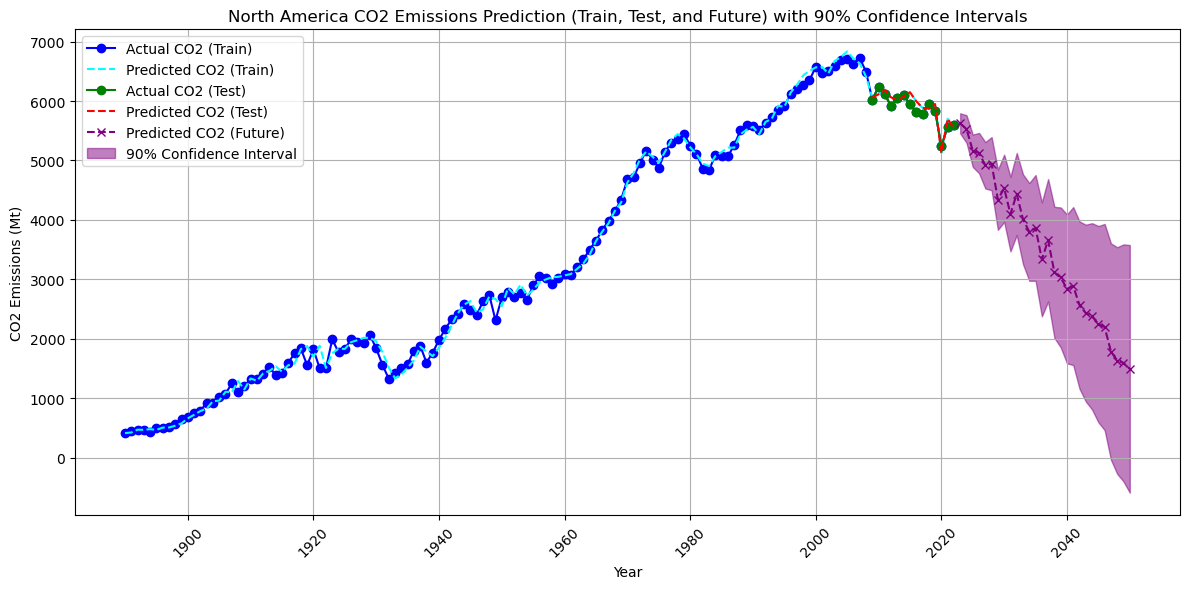

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight'

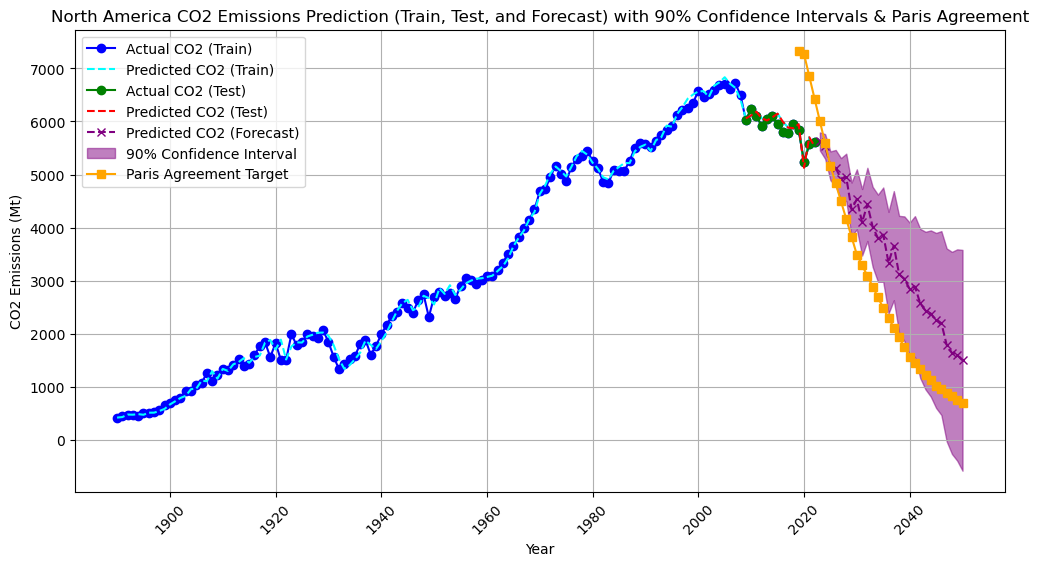

In [9]:
# US CO2 emission models with 3 inputs CO2 emited from Gas combustion, GDP and Population ARIMA model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'north_america_data' contains 'gdp', 'population', 'co2', 'oil_co2', and 'year' columns
X_na = north_america_data[['gdp', 'population', 'oil_co2']]  # Include 'oil_co2' as an additional feature
y_na = north_america_data['co2']
years_na = north_america_data['year']

#Step 1: Standardize the input features
scaler_X_na = MinMaxScaler()  # Normalize the features
X_na_scaled = scaler_X_na.fit_transform(X_na)

# Normalize the target variable y
scaler_y_na = MinMaxScaler()  # Normalize the target
y_na_scaled = scaler_y_na.fit_transform(y_na.values.reshape(-1, 1)).flatten()  # Reshape for MinMaxScaler

# Convert the standardized features back into a DataFrame with the original index (year)
X_na_scaled_df = pd.DataFrame(X_na_scaled, index=north_america_data.index, columns=['gdp', 'population', 'oil_co2'])

# Step 2: Split the data into training and testing sets (90% train, 10% test)
train_size_na = int(len(X_na_scaled_df) * 1.0)
train_size_na1 = int(len(X_na_scaled_df) * 0.9)
X_na_train, X_na_test = X_na_scaled_df.iloc[:train_size_na], X_na_scaled_df.iloc[train_size_na1:]
y_na_train, y_na_test = y_na_scaled[:train_size_na], y_na_scaled[train_size_na1:]
years_na_train, years_na_test = years_na.iloc[:train_size_na], years_na.iloc[train_size_na1:]

# Step 3: Fit the ARIMAX model
arimax_model_na = SARIMAX(y_na_train, exog=X_na_train, order=(2, 2, 2)).fit() # No Seasonality in the model

# Step 4: Make predictions on the train and test data
y_na_pred_train_scaled = arimax_model_na.predict(start=0, end=len(y_na_train) - 1, exog=X_na_train)
y_na_pred_test_scaled = arimax_model_na.predict(start=train_size_na1, end=train_size_na1 + len(y_na_test) - 1, exog=X_na_test)

# Step 5: Denormalize predictions back to the original CO2 scale using inverse_transform
y_na_pred_train = scaler_y_na.inverse_transform(y_na_pred_train_scaled.values.reshape(-1, 1)).flatten()
y_na_pred_test = scaler_y_na.inverse_transform(y_na_pred_test_scaled.values.reshape(-1, 1)).flatten()

# Prepare for future predictions (2023 to 2050)
future_years_na = pd.Series(range(2023, 2051))

# Assuming increasing population and decreasing GDP for future years
np.random.seed(0)  # For reproducibility

# Generate future population and GDP with added noise for North America
future_population_na = []
future_gdp_na = []
future_oil_co2_na = []  # Future oil CO2 values

last_population_na = X_na['population'].iloc[-1]
last_gdp_na = X_na['gdp'].iloc[-1]
last_oil_co2_na = X_na['oil_co2'].iloc[-1]

for i, year in enumerate(future_years_na):
    population_with_noise_na = last_population_na * (1.00 + population_growth_rate_na / 100 * (i / len(future_years_na))) + np.random.normal(0, 0.02 * last_population_na)
    gdp_with_noise_na = last_gdp_na * (1.00 + gdp_growth_rate_na / 100 * (i / len(future_years_na))) + np.random.normal(0, 0.02 * last_gdp_na)
    oil_co2_with_noise_na = last_oil_co2_na * (1.00 + gas_co2_growth_rate_na/100 * (i / len(future_years_na))) + np.random.normal(0, 0.02 * last_oil_co2_na)
    future_population_na.append(population_with_noise_na)
    future_gdp_na.append(gdp_with_noise_na)
    future_oil_co2_na.append(oil_co2_with_noise_na)

future_population_na = np.array(future_population_na)
future_gdp_na = np.array(future_gdp_na)
future_oil_co2_na = np.array(future_oil_co2_na)

# Standardize the future population, GDP, and oil_co2 using the same scaler
future_X_na_scaled = scaler_X_na.transform(np.column_stack([future_gdp_na, future_population_na, future_oil_co2_na]))
future_X_na_scaled_df = pd.DataFrame(future_X_na_scaled, index=future_years_na, columns=['gdp', 'population', 'oil_co2'])

# Step 6: Predict future values with 95% confidence intervals
forecast_result_na = arimax_model_na.get_forecast(steps=len(future_years_na), exog=future_X_na_scaled_df)
y_na_pred_future_scaled = forecast_result_na.predicted_mean
y_na_pred_future = scaler_y_na.inverse_transform(y_na_pred_future_scaled.values.reshape(-1, 1)).flatten()

# Extract confidence intervals (95%)
conf_int_na = forecast_result_na.conf_int(alpha=0.1)
conf_int_lower_na = scaler_y_na.inverse_transform(conf_int_na.iloc[:, 0].values.reshape(-1, 1)).flatten()
conf_int_upper_na = scaler_y_na.inverse_transform(conf_int_na.iloc[:, 1].values.reshape(-1, 1)).flatten()

# Step 7: Plot training, test, and future predictions with confidence intervals
plt.figure(figsize=(12, 6))

# Plot training data for North America
plt.plot(years_na_train, scaler_y_na.inverse_transform(y_na_train.reshape(-1, 1)), label='Actual CO2 (Train)', color='blue', marker='o')
plt.plot(years_na_train, y_na_pred_train, label='Predicted CO2 (Train)', color='cyan', linestyle='--')

# Plot test data for North America
plt.plot(years_na_test, scaler_y_na.inverse_transform(y_na_test.reshape(-1, 1)), label='Actual CO2 (Test)', color='green', marker='o')
plt.plot(years_na_test, y_na_pred_test, label='Predicted CO2 (Test)', color='red', linestyle='--')

# Plot future predictions for North America
plt.plot(future_years_na, y_na_pred_future, label='Predicted CO2 (Future)', color='purple', linestyle='--', marker='x')

# Plot confidence intervals for future predictions
plt.fill_between(future_years_na, conf_int_lower_na, conf_int_upper_na, color='purple', alpha=0.5, label='90% Confidence Interval')

# Customize the plot
plt.title('North America CO2 Emissions Prediction (Train, Test, and Future) with 90% Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Mt)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot with Paris Agreement
plt.figure(figsize=(12, 6))
plt.plot(years_na_train, scaler_y_na.inverse_transform(y_na_train.reshape(-1, 1)), label='Actual CO2 (Train)', color='blue', marker='o')
plt.plot(years_na_train, y_na_pred_train, label='Predicted CO2 (Train)', color='cyan', linestyle='--')

# Plot test data
plt.plot(years_na_test, scaler_y_na.inverse_transform(y_na_test.reshape(-1, 1)), label='Actual CO2 (Test)', color='green', marker='o')
plt.plot(years_na_test, y_na_pred_test, label='Predicted CO2 (Test)', color='red', linestyle='--')

# Plot future predictions
plt.plot(future_years_na, y_na_pred_future, label='Predicted CO2 (Forecast)', color='purple', linestyle='--', marker='x')

# Plot confidence intervals for future predictions
plt.fill_between(future_years_na, conf_int_lower_na, conf_int_upper_na, color='purple', alpha=0.5, label='90% Confidence Interval')

# Plot df_specific_sheet data for the Paris Agreement target
plt.plot(df_specific_sheet['Upper end of '], df_specific_sheet['1.5°C Paris Agreement compatible US']+df_specific_sheet['1.5°C Paris Agreement compatible Canada'], label='Paris Agreement Target', color='orange', linestyle='-', marker='s')

# Customize the plot
plt.title('North America CO2 Emissions Prediction (Train, Test, and Forecast) with 90% Confidence Intervals & Paris Agreement')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Mt)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight

## Subsection 1.6 : Time Series Analysis
Description: Prepares data for time series analysis and employs models like SARIMAX to forecast emissions trends for the North America.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Data normalization and splitting
# Assuming 'north_america_data' contains 'gdp', 'population', 'co2', 'oil_co2', and 'year' columns
X_na = north_america_data[['gdp', 'population', 'oil_co2']]  # Include 'oil_co2' as an additional feature
y_na = north_america_data['co2']
years_na = north_america_data['year']

# Step 1: Standardize the input features
scaler_X_na = MinMaxScaler()  # Normalize the features
X_na_scaled = scaler_X_na.fit_transform(X_na)

# Normalize the target variable y
scaler_y_na = MinMaxScaler()  # Normalize the target
y_na_scaled = scaler_y_na.fit_transform(y_na.values.reshape(-1, 1)).flatten()  # Reshape for MinMaxScaler

# Convert the standardized features back into a DataFrame with the original index (year)
X_na_scaled_df = pd.DataFrame(X_na_scaled, index=north_america_data.index, columns=['gdp', 'population', 'oil_co2'])

# Step 2: Split the data into training and testing sets (90% train, 10% test)
train_size_na = int(len(X_na_scaled_df) * 1.0)
train_size_na1 = int(len(X_na_scaled_df) * 0.9)
X_na_train, X_na_test = X_na_scaled_df.iloc[:train_size_na], X_na_scaled_df.iloc[train_size_na1:]
y_na_train, y_na_test = y_na_scaled[:train_size_na], y_na_scaled[train_size_na1:]
years_na_train, years_na_test = years_na.iloc[:train_size_na], years_na.iloc[train_size_na1:]

In [11]:
# North America CO2 emission models with 3 inputs CO2 emited from Gas combustion, GDP and Population 
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import matplotlib.pyplot as plt

# Define seasonal order for SARIMAX model (example: yearly seasonality, s=12 for monthly data)
seasonal_order = (1, 1, 1, 5)  # Adjust based on your data's seasonal characteristics

# Fit the SARIMAX model with seasonality
sarimax_model_na = SARIMAX(y_na_train, exog=X_na_train, order=(2, 2, 2), seasonal_order=seasonal_order).fit()

# Make predictions on the train and test data
y_na_pred_train_scaled = sarimax_model_na.predict(start=0, end=len(y_na_train) - 1, exog=X_na_train)
y_na_pred_test_scaled = sarimax_model_na.predict(start=train_size_na1, end=train_size_na1 + len(y_na_test) - 1, exog=X_na_test)

# Denormalize predictions back to the original CO2 scale
y_na_pred_train = scaler_y_na.inverse_transform(y_na_pred_train_scaled.values.reshape(-1, 1)).flatten()
y_na_pred_test = scaler_y_na.inverse_transform(y_na_pred_test_scaled.values.reshape(-1, 1)).flatten()

# # Prepare for future predictions (2023 to 2050)
future_years_na = pd.Series(range(2023, 2051))
# Predict future values
forecast_result_na = sarimax_model_na.get_forecast(steps=len(future_years_na), exog=future_X_na_scaled_df)
y_na_pred_future_scaled = forecast_result_na.predicted_mean
y_na_pred_future = scaler_y_na.inverse_transform(y_na_pred_future_scaled.values.reshape(-1, 1)).flatten()

# Extract confidence intervals (95%)
conf_int_na = forecast_result_na.conf_int(alpha=0.05)
conf_int_lower_na = scaler_y_na.inverse_transform(conf_int_na.iloc[:, 0].values.reshape(-1, 1)).flatten()
conf_int_upper_na = scaler_y_na.inverse_transform(conf_int_na.iloc[:, 1].values.reshape(-1, 1)).flatten()

C:\Users\Sarupa\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Subsection 1.7 : Model selection and validation
Description: This section prepares the data for time series analysis and employs models such as SARIMAX (Seasonal AutoRegressive Integrated 
Moving Average with eXogenous variables) to forecast emissions trends for North America. The process involves selecting appropriate model 
parameters, validating model performance through techniques like cross-validation, and analyzing the results to ensure accurate 
and reliable forecasts.

In [12]:
# # Selecting best model based on AIC criterion  # Run it when needs to 
# # Import necessary libraries
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Define the seasonal orders and non-seasonal orders to test
# seasonal_orders = [(1, 1, 1, 5), (1, 1, 1, 4), (1, 1, 1, 6)]
# non_seasonal_orders = [(2, 2, 2), (3, 3, 3)]

# # Initialize a dictionary to store AIC values for each model
# aic_values = {}

# # Iterate through each combination of seasonal and non-seasonal orders
# for seasonal_order in seasonal_orders:
#     for non_seasonal_order in non_seasonal_orders:
#         try:
#             # Fit the SARIMAX model
#             model = SARIMAX(y_na_train, exog=X_na_train, order=non_seasonal_order, seasonal_order=seasonal_order).fit(disp=False)
            
#             # Store AIC value
#             aic_values[(non_seasonal_order, seasonal_order)] = model.aic
#         except Exception as e:
#             print(f"Error fitting model with order {non_seasonal_order} and seasonal order {seasonal_order}: {e}")

# # Print AIC values for comparison
# for order_combination, aic in aic_values.items():
#     print(f"Non-seasonal order: {order_combination[0]}, Seasonal order: {order_combination[1]}, AIC: {aic}")

# # Find the best model based on the lowest AIC value
# best_model = min(aic_values, key=aic_values.get)
# print(f"\nBest model: Non-seasonal order: {best_model[0]}, Seasonal order: {best_model[1]}, AIC: {aic_values[best_model]}")

# # The best model ( Non-seasonal order: (2, 2, 2), Seasonal order: (1, 1, 1, 4)) has too much variance so we selected
# # Non-seasonal order: (2, 2, 2), Seasonal order: (1, 1, 1, 5)

## Subsection 1.8 : Model Evaluation and Prediction
Description: Calculates various error metrics like MSE and RMSE for evaluating the predictive performance of the models.

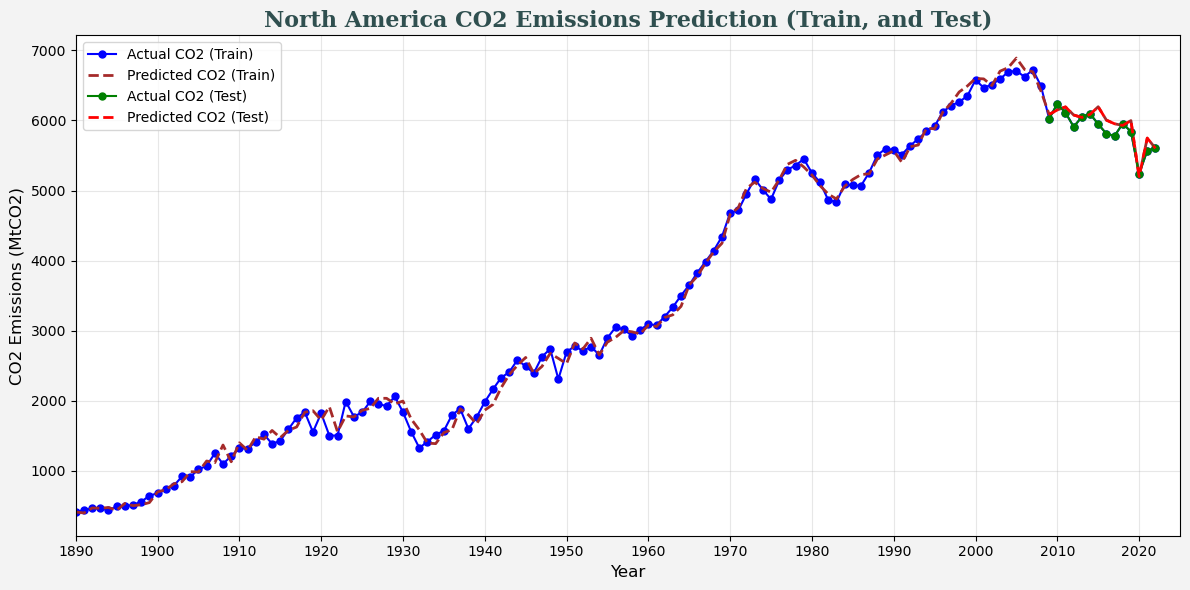

In [13]:
from matplotlib.font_manager import FontProperties

# Create a font object with desired properties
title_font = FontProperties(family='serif', weight='bold', size=16)  # Set your preferred font family, weight, and size

# Create the plot
plt.figure(figsize=(12, 6))

# Plot training data for North America
plt.plot(years_na_train, scaler_y_na.inverse_transform(y_na_train.reshape(-1, 1)), label='Actual CO2 (Train)', color='blue', marker='o', markersize=5)
plt.plot(years_na_train, y_na_pred_train, label='Predicted CO2 (Train)', color='brown', linestyle='--', linewidth=2.0)

# Plot test data for North America
plt.plot(years_na_test, scaler_y_na.inverse_transform(y_na_test.reshape(-1, 1)), label='Actual CO2 (Test)', color='green', marker='o', markersize=5)
plt.plot(years_na_test, y_na_pred_test, label='Predicted CO2 (Test)', color='red', linestyle='--', linewidth=2.0)

# Customize the plot
plt.title('North America CO2 Emissions Prediction (Train, and Test)',
          fontproperties=title_font, color='#2F4F4F')  # Dark Slate Gray color for the title
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO2 Emissions (MtCO2)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Set the x-axis to start from the minimum year and end at 2025
plt.xlim(left=min(years_na_train), right=2025)

# Customize x-axis tick marks to include 2025
plt.xticks(np.arange(min(years_na_train), 2025, step=10), rotation=0)

# Set the figure's background color
plt.gcf().set_facecolor('#F3F3F3')  # Light gray background

# Optimize layout
plt.tight_layout()

# Save the plot as a JPG file
plt.savefig('co2_prediction.jpg', format='jpg', dpi=400)
plt.show()


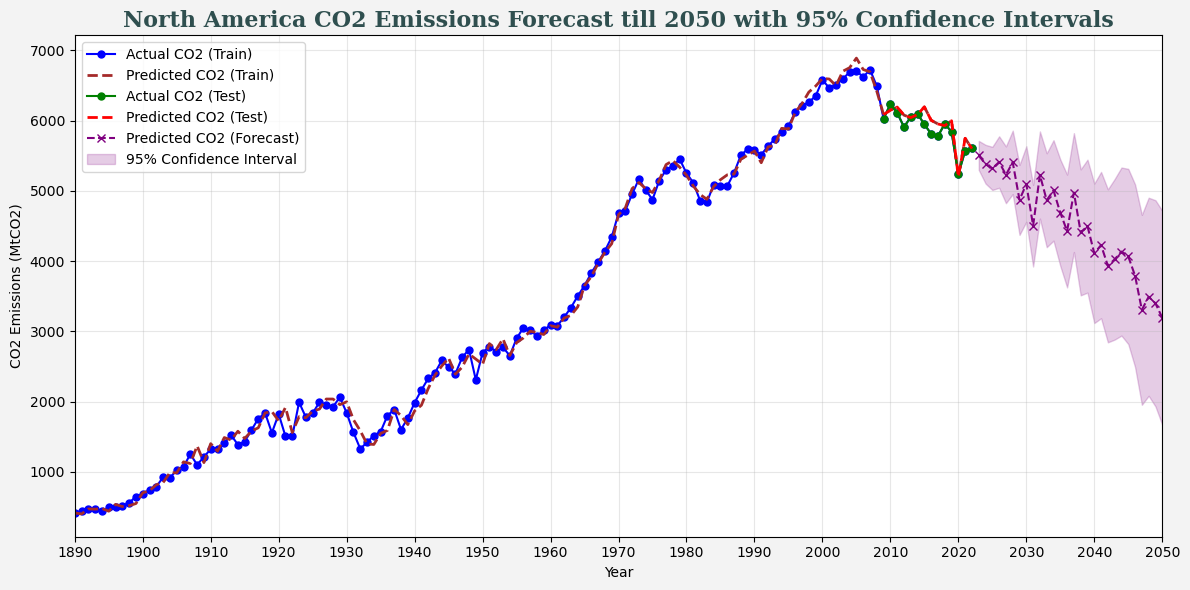

In [14]:
# Plot training, test, and future predictions with confidence intervals
plt.figure(figsize=(12, 6))

# Plot training data for North America
plt.plot(years_na_train, scaler_y_na.inverse_transform(y_na_train.reshape(-1, 1)), label='Actual CO2 (Train)', color='blue', marker='o', markersize=5)
plt.plot(years_na_train, y_na_pred_train, label='Predicted CO2 (Train)', color='brown', linestyle='--', linewidth=2.0)

# Plot test data for North America
plt.plot(years_na_test, scaler_y_na.inverse_transform(y_na_test.reshape(-1, 1)), label='Actual CO2 (Test)', color='green', marker='o', markersize=5)
plt.plot(years_na_test, y_na_pred_test, label='Predicted CO2 (Test)', color='red', linestyle='--', linewidth=2.0)

# Plot future predictions for North America
plt.plot(future_years_na, y_na_pred_future, label='Predicted CO2 (Forecast)', color='purple', linestyle='--', marker='x')

# Plot confidence intervals for future predictions
plt.fill_between(future_years_na, conf_int_lower_na, conf_int_upper_na, color='purple', alpha=0.2, label='95% Confidence Interval')

# Customize the plot
plt.title('North America CO2 Emissions Forecast till 2050 with 95% Confidence Intervals',fontproperties=title_font, color='#2F4F4F')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO2)')
plt.legend()
plt.grid(alpha=0.3)
# Set the x-axis to start from the minimum year and end at 2050
plt.xlim(left=min(years_na_train), right=2050)

# Customize x-axis tick marks to include 2050
plt.xticks(np.arange(min(years_na_train), 2051, step=10), rotation=45)  # Adjust step for tick interval


plt.xticks(rotation=0)

# Set background color according to the image (#F3F3F3)
plt.gcf().set_facecolor('#F3F3F3')  # Set the figure's face color (background)

plt.tight_layout()

# Save the plot as a JPG file
plt.savefig('co2_emissions_prediction.jpg', format='jpg', dpi=400)  # Specify the file name and format
plt.show()


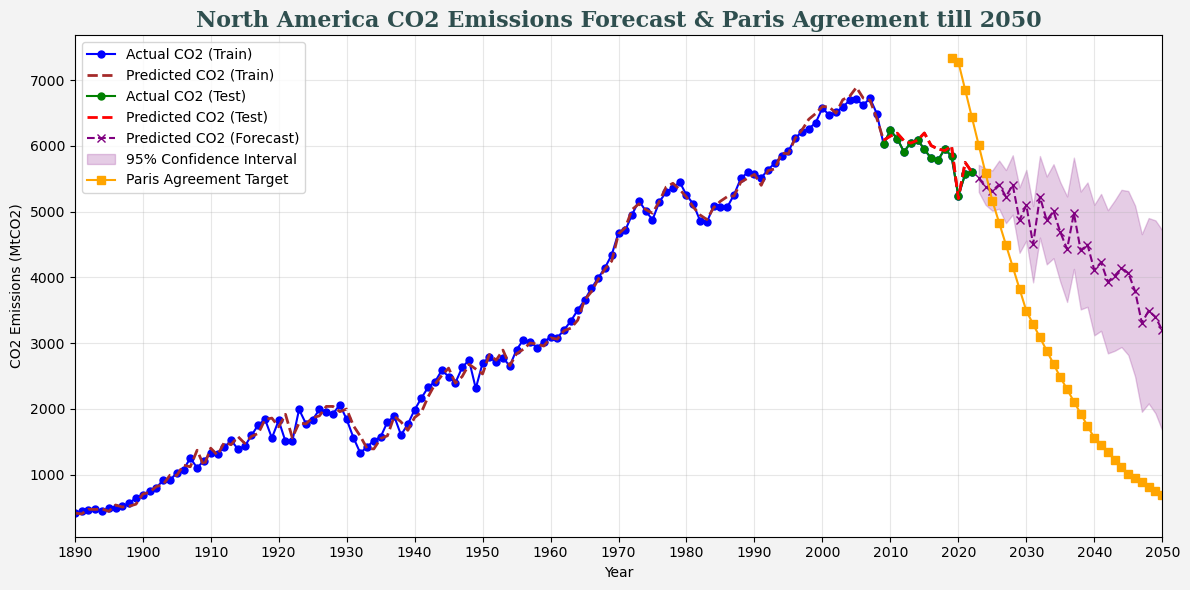

In [15]:
# Plot with Paris Agreement target
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(years_na_train, scaler_y_na.inverse_transform(y_na_train.reshape(-1, 1)), label='Actual CO2 (Train)', color='blue', marker='o', markersize=5)
plt.plot(years_na_train, y_na_pred_train, label='Predicted CO2 (Train)', color='brown', linestyle='--', linewidth=2.0)

# Plot test data
plt.plot(years_na_test, scaler_y_na.inverse_transform(y_na_test.reshape(-1, 1)), label='Actual CO2 (Test)', color='green', marker='o', markersize=5)
plt.plot(years_na_test, y_na_pred_test, label='Predicted CO2 (Test)', color='red', linestyle='--', linewidth=2.0)

# Plot future predictions
plt.plot(future_years_na, y_na_pred_future, label='Predicted CO2 (Forecast)', color='purple', linestyle='--', marker='x')

# Plot confidence intervals for future predictions
plt.fill_between(future_years_na, conf_int_lower_na, conf_int_upper_na, color='purple', alpha=0.2, label='95% Confidence Interval')

# Plot Paris Agreement target
plt.plot(df_specific_sheet['Upper end of '], 
         df_specific_sheet['1.5°C Paris Agreement compatible US'] + df_specific_sheet['1.5°C Paris Agreement compatible Canada'], 
         label='Paris Agreement Target', color='orange', linestyle='-', marker='s')

# Customize the plot
plt.title('North America CO2 Emissions Forecast & Paris Agreement till 2050',fontproperties=title_font, color='#2F4F4F')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO2)')
plt.legend()
plt.grid(alpha=0.3)

# Set the x-axis to start from the minimum year and end at 2050
plt.xlim(left=min(years_na_train), right=2050)

# Customize x-axis tick marks to include 2050
plt.xticks(np.arange(min(years_na_train), 2051, step=10), rotation=45)

# Set background color according to the image (#F3F3F3)
plt.gcf().set_facecolor('#F3F3F3')


plt.xticks(rotation=0)
plt.tight_layout()
# Save the plot as a JPG file
plt.savefig('co2_emissions_prediction_plus_Paris_agreement.jpg', format='jpg', dpi=400)  # Specify the file name and format

plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
# Calculate RMSE, MSE, and NRMSE for training and test data
rmse_train = np.sqrt(mean_squared_error(scaler_y_na.inverse_transform(y_na_train.reshape(-1, 1)), y_na_pred_train))
rmse_test = np.sqrt(mean_squared_error(scaler_y_na.inverse_transform(y_na_test.reshape(-1, 1)), y_na_pred_test))

# Calculate mean values for percentage calculation
mean_train = np.mean(scaler_y_na.inverse_transform(y_na_train.reshape(-1, 1)))
mean_test = np.mean(scaler_y_na.inverse_transform(y_na_test.reshape(-1, 1)))

# Convert RMSE and MSE to percentages
rmse_train_percentage = (rmse_train / mean_train) * 100
rmse_test_percentage = (rmse_test / mean_test) * 100
# Print RMSE, MSE, and NRMSE results
print(f'RMSE for Training Data: {rmse_train:.2f} Mt ({rmse_train_percentage:.2f}%)')
print(f'RMSE for Test Data: {rmse_test:.2f} Mt ({rmse_test_percentage:.2f}%)')


RMSE for Training Data: 110.43 Mt (3.22%)
RMSE for Test Data: 129.25 Mt (2.20%)


2249 ± 1523 MtCO2


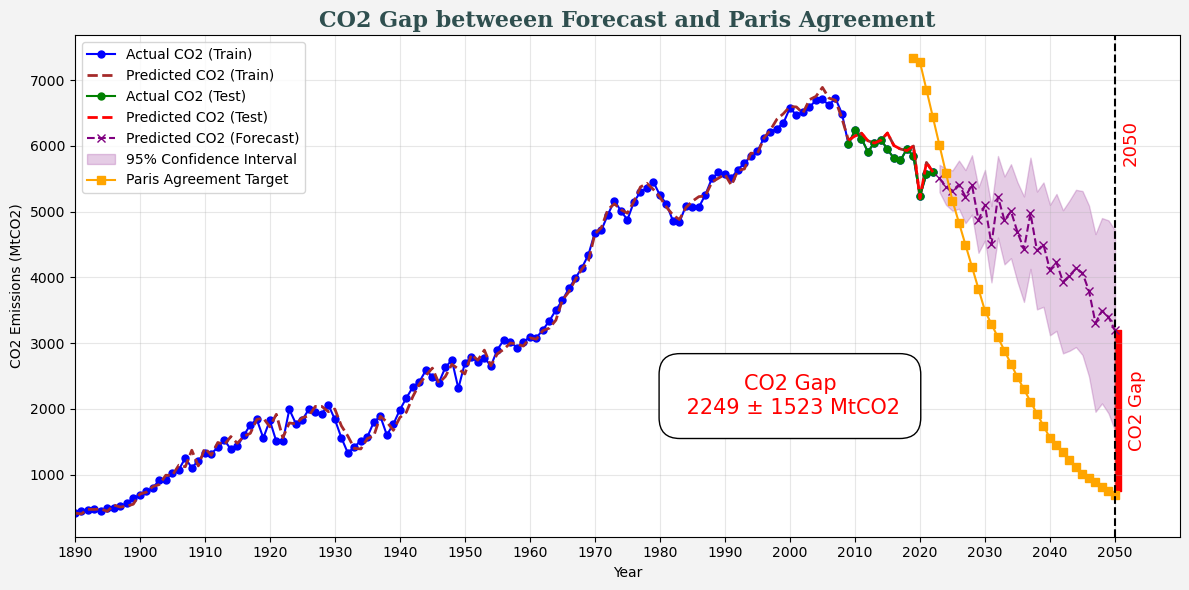

In [17]:
# Index for the year 2050
year_2050_index = future_years_na.tolist().index(2050)

# Forecast value for 2050
forecast_2050 = y_na_pred_future[year_2050_index]

# Confidence interval bounds for 2050
conf_int_lower_2050 = conf_int_lower_na[year_2050_index]
conf_int_upper_2050 = conf_int_upper_na[year_2050_index]

# Calculate the uncertainty (XX) for forecast
uncertainty_2050 = (conf_int_upper_2050 - conf_int_lower_2050) / 2

# Paris Agreement target for 2050
paris_target_2050 = (df_specific_sheet['1.5°C Paris Agreement compatible US'][year_2050_index] + 
                     df_specific_sheet['1.5°C Paris Agreement compatible Canada'][year_2050_index])

# Subtract Paris target from the forecast for 2050
co2_gap_2050 = forecast_2050 - paris_target_2050

# Subtract uncertainty from the gap (uncertainty is the same for the forecast)
co2_gap_with_uncertainty = f"{co2_gap_2050:.0f} ± {uncertainty_2050:.0f} MtCO2"

print(co2_gap_with_uncertainty)


# Prepare to plot training, test, and future predictions with confidence intervals
plt.figure(figsize=(12, 6))

# Plot training data for North America
plt.plot(years_na_train, scaler_y_na.inverse_transform(y_na_train.reshape(-1, 1)), 
         label='Actual CO2 (Train)', color='blue', marker='o', markersize=5)
plt.plot(years_na_train, y_na_pred_train, 
         label='Predicted CO2 (Train)', color='brown', linestyle='--', linewidth=2.0)

# Plot test data for North America
plt.plot(years_na_test, scaler_y_na.inverse_transform(y_na_test.reshape(-1, 1)), 
         label='Actual CO2 (Test)', color='green', marker='o', markersize=5)
plt.plot(years_na_test, y_na_pred_test, 
         label='Predicted CO2 (Test)', color='red', linestyle='--', linewidth=2.0)

# Plot future predictions for North America
plt.plot(future_years_na, y_na_pred_future, 
         label='Predicted CO2 (Forecast)', color='purple', linestyle='--', marker='x')

# Plot confidence intervals for future predictions
plt.fill_between(future_years_na, conf_int_lower_na, conf_int_upper_na, 
                 color='purple', alpha=0.2, label='95% Confidence Interval')

# Plot Paris Agreement target
plt.plot(df_specific_sheet['Upper end of '], 
         df_specific_sheet['1.5°C Paris Agreement compatible US'] + 
         df_specific_sheet['1.5°C Paris Agreement compatible Canada'], 
         label='Paris Agreement Target', color='orange', linestyle='-', marker='s')

# Highlight the gap between forecast and Paris Agreement target in 2050
year_2050_index = future_years_na.tolist().index(2050)  # Index of 2050 in future years
forecast_2050 = y_na_pred_future[year_2050_index]  # Model prediction for 2050
paris_target_2050 = (df_specific_sheet['1.5°C Paris Agreement compatible US'][year_2050_index] + 
                     df_specific_sheet['1.5°C Paris Agreement compatible Canada'][year_2050_index]) - 200  # Adjust target if needed

# Draw a vertical line at 2050 to indicate the gap
plt.axvline(x=2050, color='black', linestyle='--')

# Add text label "2050" on the vertical line vertically at the top
plt.text(2050 + 1, max(forecast_2050, paris_target_2050) + 2500, '2050', fontsize=13, color='red', va='bottom', rotation=90)

# Create a shaded area to show the gap with a more prominent red color
if forecast_2050 > paris_target_2050:
    plt.fill_betweenx([paris_target_2050, forecast_2050], 2050, 2050 + 1, color='red', alpha=1.0)  # Increased alpha for more opacity
else:
    plt.fill_betweenx([forecast_2050, paris_target_2050], 2050, 2050 + 1, color='red', alpha=1.0)  # Increased alpha for more opacity

# Add text label for the CO2 gap
plt.text(2050 + 2, (forecast_2050 + paris_target_2050) / 2, 'CO2 Gap', fontsize=13, color='red', va='center', rotation=90)

# Add additional text from the uploaded image
plt.text(2000, forecast_2050 -1000 , 
         'CO2 Gap\n 2249 ± 1523 MtCO2', 
         fontsize=15, color='red', va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'))

# Customize the plot
plt.title('CO2 Gap betweeen Forecast and Paris Agreement',fontproperties=title_font, color='#2F4F4F')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO2)')
plt.legend()
plt.grid(alpha=0.3)
# Set the x-axis to start from the minimum year and end at 2060
plt.xlim(left=min(years_na_train), right=2060)

# Customize x-axis tick marks to include 2050
plt.xticks(np.arange(min(years_na_train), 2051, step=10), rotation=45)
# Set background color according to the image (#F3F3F3)
plt.gcf().set_facecolor('#F3F3F3')
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot as a JPG file
plt.savefig('co2_emissions_with_gap.jpg', format='jpg', dpi=400)

plt.show()


Year: 2023, CO2 Gap: -1830 MtCO2, Lower Bound: -2037 MtCO2, Upper Bound: -1624 MtCO2
Year: 2024, CO2 Gap: -1897 MtCO2, Lower Bound: -2172 MtCO2, Upper Bound: -1621 MtCO2
Year: 2025, CO2 Gap: -1535 MtCO2, Lower Bound: -1842 MtCO2, Upper Bound: -1228 MtCO2
Year: 2026, CO2 Gap: -1022 MtCO2, Lower Bound: -1389 MtCO2, Upper Bound: -656 MtCO2
Year: 2027, CO2 Gap: -782 MtCO2, Lower Bound: -1186 MtCO2, Upper Bound: -378 MtCO2
Year: 2028, CO2 Gap: -183 MtCO2, Lower Bound: -634 MtCO2, Upper Bound: 269 MtCO2
Year: 2029, CO2 Gap: -295 MtCO2, Lower Bound: -794 MtCO2, Upper Bound: 203 MtCO2
Year: 2030, CO2 Gap: 266 MtCO2, Lower Bound: -272 MtCO2, Upper Bound: 804 MtCO2
Year: 2031, CO2 Gap: 8 MtCO2, Lower Bound: -573 MtCO2, Upper Bound: 588 MtCO2
Year: 2032, CO2 Gap: 1065 MtCO2, Lower Bound: 444 MtCO2, Upper Bound: 1686 MtCO2
Year: 2033, CO2 Gap: 1041 MtCO2, Lower Bound: 372 MtCO2, Upper Bound: 1710 MtCO2
Year: 2034, CO2 Gap: 1516 MtCO2, Lower Bound: 801 MtCO2, Upper Bound: 2231 MtCO2
Year: 2035, CO2

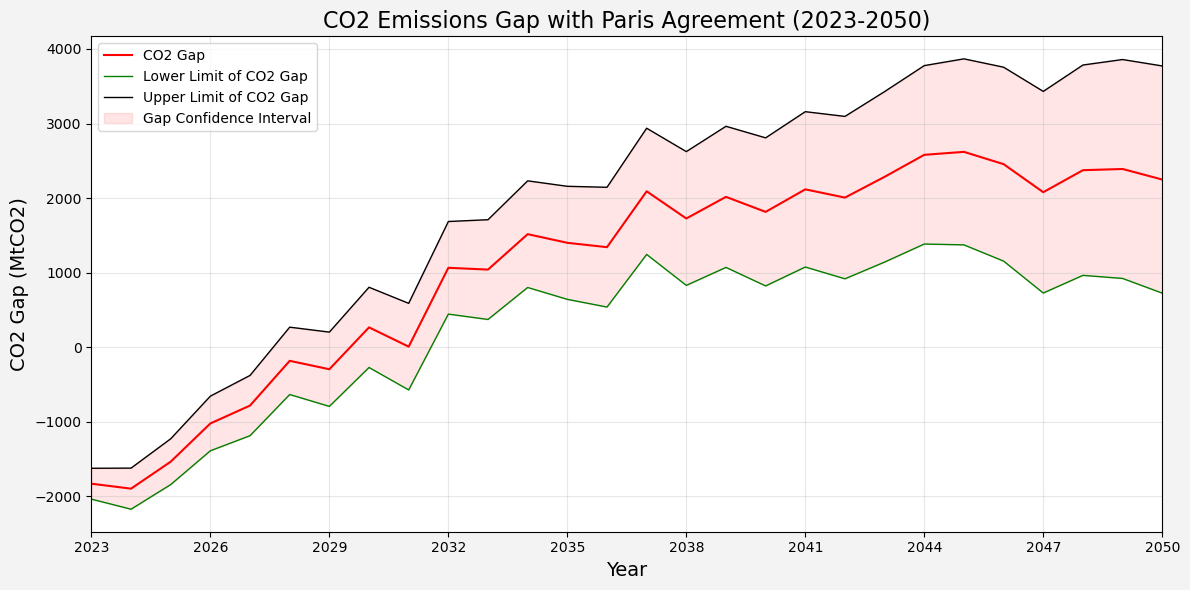

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store gaps and uncertainties for each future year
co2_gaps = []
co2_gap_lowers = []
co2_gap_uppers = []

# Iterate through each year in future_years_na
for index, year in enumerate(future_years_na):
    # Forecast value for the current year
    forecast_value = y_na_pred_future[index]
    
    # Confidence interval bounds for the current year
    conf_int_lower = conf_int_lower_na[index]
    conf_int_upper = conf_int_upper_na[index]
    
    # Calculate the uncertainty for the forecast
    uncertainty = (conf_int_upper - conf_int_lower) / 2
    
    # Paris Agreement target for the current year
    paris_target = (df_specific_sheet['1.5°C Paris Agreement compatible US'][index] + 
                    df_specific_sheet['1.5°C Paris Agreement compatible Canada'][index])
    
    # Subtract Paris target from the forecast
    co2_gap = forecast_value - paris_target
    
    # Append results to the lists
    co2_gaps.append(co2_gap)
    co2_gap_lowers.append(co2_gap - uncertainty)
    co2_gap_uppers.append(co2_gap + uncertainty)

# Convert lists to numpy arrays for easy manipulation if needed
co2_gaps = np.array(co2_gaps)
co2_gap_lowers = np.array(co2_gap_lowers)
co2_gap_uppers = np.array(co2_gap_uppers)

# Print the results
for year, gap, lower, upper in zip(future_years_na, co2_gaps, co2_gap_lowers, co2_gap_uppers):
    print(f"Year: {year}, CO2 Gap: {gap:.0f} MtCO2, Lower Bound: {lower:.0f} MtCO2, Upper Bound: {upper:.0f} MtCO2")

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the CO2 gap
plt.plot(future_years_na, co2_gaps, label='CO2 Gap', color='red', linestyle='-', alpha=1.0)

# Plot the lower and upper limits of the CO2 gap
plt.plot(future_years_na, co2_gap_lowers, label='Lower Limit of CO2 Gap', color='green', linestyle='-', linewidth=1.0)
plt.plot(future_years_na, co2_gap_uppers, label='Upper Limit of CO2 Gap', color='black', linestyle='-', linewidth=1.0)

# Fill the area between the lower and upper limits for better visualization
plt.fill_between(future_years_na, co2_gap_lowers, co2_gap_uppers, color='red', alpha=0.1, label='Gap Confidence Interval')

# Set x-axis limits to ensure it starts from 2023
plt.xlim(left=2023, right=2050)

# Set x-axis ticks and customize
plt.xticks(np.arange(2023, 2051, step=3), rotation=0)

# Set background color to match the image
plt.gcf().set_facecolor('#F3F3F3')

# Customize the plot
plt.title('CO2 Emissions Gap with Paris Agreement (2023-2050)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Gap (MtCO2)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Save the plot as a JPG file
plt.savefig('co2_gap_with_limits.jpg', format='jpg', dpi=400)

# Show the plot
plt.show()


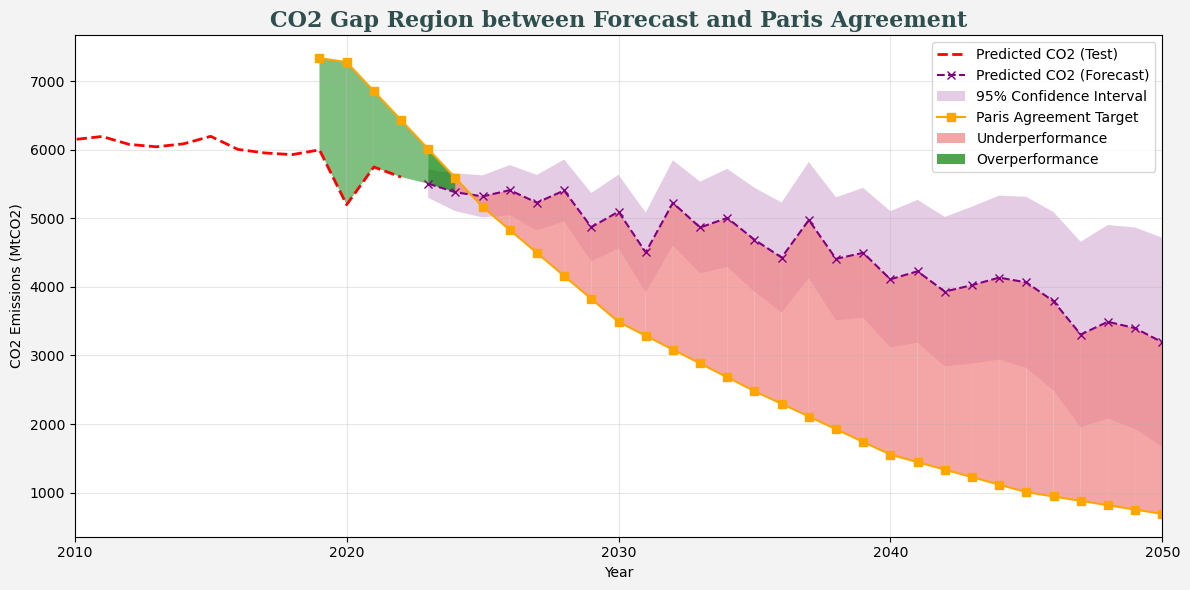

In [19]:
# Prepare to plot predictions and Paris Agreement target
plt.figure(figsize=(12, 6))

# Plot test data for North America
plt.plot(years_na_test, y_na_pred_test, 
         label='Predicted CO2 (Test)', color='red', linestyle='--', linewidth=2.0)

future_years_na_list= future_years_na
# Plot future predictions for North America
plt.plot(future_years_na_list, y_na_pred_future, 
         label='Predicted CO2 (Forecast)', color='purple', linestyle='--', marker='x')

# # Plot confidence intervals for future predictions
plt.fill_between(future_years_na_list, conf_int_lower_na, conf_int_upper_na, 
                 color='purple', alpha=0.2, label='95% Confidence Interval', edgecolor='none')

# Calculate Paris Agreement forecast
paris_forecast = df_specific_sheet['1.5°C Paris Agreement compatible US'] + df_specific_sheet['1.5°C Paris Agreement compatible Canada']

# Plot Paris Agreement target
plt.plot(df_specific_sheet['Upper end of '], 
         paris_forecast, 
         label='Paris Agreement Target', color='orange', linestyle='-', marker='s')

# Fill the gap with light red if forecast is higher than Paris Agreement target, starting from 2025
for i in range(1, len(future_years_na_list)):
    forecast_value = y_na_pred_future[i]
    paris_target = paris_forecast[i + 4]  # Adjust indexing accordingly

    forecast_value1 = y_na_pred_future[i - 1]
    paris_target1 = paris_forecast[i - 1 + 4]

    # Print values for debugging
    #print(f'Index: {i}, Forecast Value: {forecast_value}, Paris Target: {paris_target}, Year: {future_years_na_list[i]}')

    # Check if forecast exceeds target and the year is 2025 or later
    if forecast_value > paris_target and future_years_na_list[i] >= 2025:
        plt.fill_between([future_years_na_list[i - 1], future_years_na_list[i]], 
                         [forecast_value1, forecast_value], 
                         [paris_target1, paris_target], 
                         color='lightcoral', alpha=0.7, label='Underperformance' if i == 17 else "", edgecolor='none')

# Fill areas between predicted values and Paris Agreement targets
for i in range(5):
    if i < 3:
        # Fill the area for the first three years
        plt.fill_between(
            [2019 + i, 2019 + 1 + i], 
            [y_na_pred_test[10 + i], y_na_pred_test[10 + i + 1]], 
            [paris_forecast[i], paris_forecast[i + 1]], 
            color='green', alpha=0.5, edgecolor='none'
        )
    elif i == 3:
        # Special case for the transition year
        plt.fill_between(
            [2022, 2023], 
            [y_na_pred_test[13], y_na_pred_future[0]], 
            [paris_forecast[3], paris_forecast[4]], 
            color='green', alpha=0.5, edgecolor='none'
        )
    else:
        # Fill the area for the last two years with future predictions
        plt.fill_between(
            [2023, 2024], 
            [y_na_pred_future[0], y_na_pred_future[1]], 
            [paris_forecast[4], paris_forecast[5]], 
            color='green', alpha=0.7, edgecolor='none', label='Overperformance' if i == 4 else ""
        )

# Customize the plot
plt.title('CO2 Gap Region between Forecast and Paris Agreement', fontproperties=title_font, color='#2F4F4F')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO2)')
plt.legend()
plt.grid(alpha=0.3)

# Set x-axis to start from 2010
plt.xlim(left=2010, right=2050)

# Customize x-axis tick marks to include 2050
plt.xticks(np.arange(2010, 2051, step=10), rotation=0)

# Set background color according to the image (#F3F3F3)
plt.gcf().set_facecolor('#F3F3F3')
plt.tight_layout()

# Save the plot as a JPG file
plt.savefig('co2_emissions_with_gap_colored_triangles.jpg', format='jpg', dpi=400)

plt.show()


## Subsection 1.9 : Plotting CCUS 

Description: This piece of data is saved in Operation & Estimated capacity by IEA (Mt CO2/yr) saved in excel file Cumulative_Estimated_Capacity.xlsx
The estimation can be found in the CCUS section

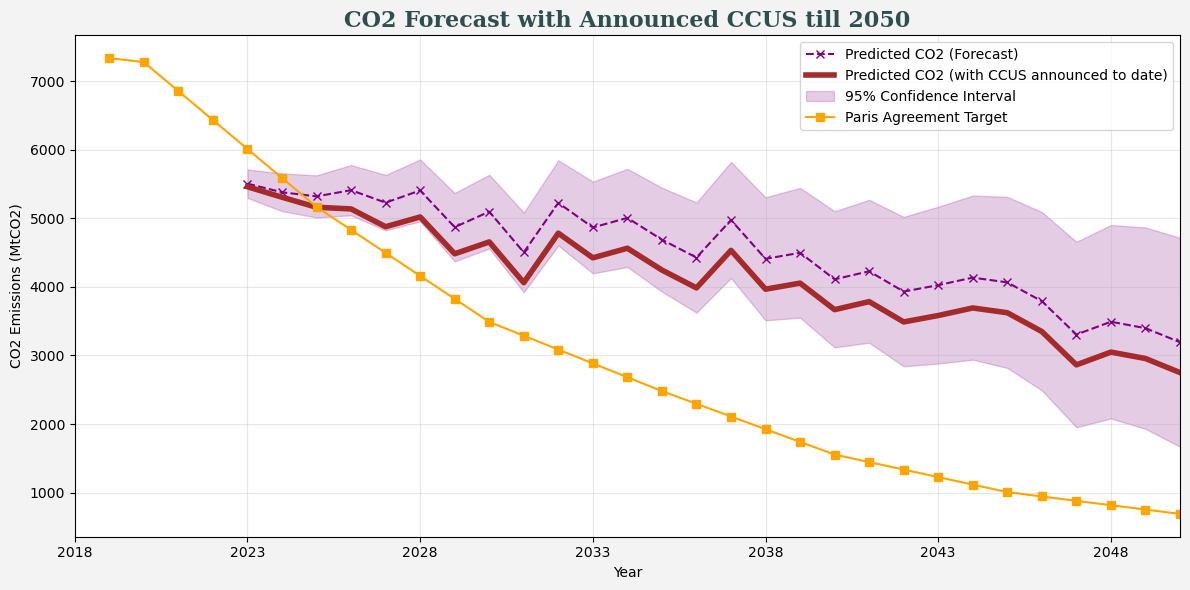

In [20]:
import numpy as np

# Create a structured array with years and capacities
data = np.array([
    (1972, 0.5),
    (1973, 0.5),
    (1974, 0.5),
    (1975, 0.5),
    (1976, 0.5),
    (1977, 0.5),
    (1978, 0.5),
    (1979, 0.5),
    (1980, 0.5),
    (1981, 0.5),
    (1982, 1.18),
    (1983, 1.18),
    (1984, 1.18),
    (1985, 1.18),
    (1986, 4.68),
    (1987, 4.68),
    (1988, 4.68),
    (1989, 4.68),
    (1990, 4.68),
    (1991, 4.68),
    (1992, 4.68),
    (1993, 4.68),
    (1994, 4.68),
    (1995, 4.68),
    (1996, 4.68),
    (1997, 4.68),
    (1998, 4.68),
    (1999, 4.68),
    (2000, 7.68),
    (2001, 7.68),
    (2002, 7.68),
    (2003, 8.03),
    (2004, 8.03),
    (2005, 8.03),
    (2006, 8.03),
    (2007, 8.03),
    (2008, 8.03),
    (2009, 8.34),
    (2010, 16.16),
    (2011, 16.16),
    (2012, 16.32),
    (2013, 19.32),
    (2014, 20.32),
    (2015, 21.42),
    (2016, 21.42),
    (2017, 22.32),
    (2018, 22.32),
    (2019, 22.32),
    (2020, 42.62),
    (2021, 42.62),
    (2022, 42.8),
    (2023, 44.582),
    (2024, 72.128),
    (2025, 158.368),
    (2026, 273.418),
    (2027, 350.838),
    (2028, 386.016),
    (2029, 388.016),
    (2030, 441.516),
    (2031, 441.516),
    (2032, 442.516),
    (2033, 442.516),
    (2034, 442.516),
    (2035, 442.516),
    (2036, 442.516),
    (2037, 442.516),
    (2038, 442.516),
    (2039, 442.516),
    (2040, 442.516),
    (2041, 442.516),
    (2042, 442.516),
    (2043, 442.516),
    (2044, 442.516),
    (2045, 442.516),
    (2046, 442.516),
    (2047, 442.516),
    (2048, 442.516),
    (2049, 442.516),
    (2050, 442.516)
], dtype=[('Year', 'i4'), ('Estimated_Capacity', 'f4')])


# Filter for capacities greater than the one in 2023
capacities_2024_and_later = data[data['Year'] > 2022]['Estimated_Capacity']

# Optional: Convert to a standard NumPy array
capacities_array = np.array(capacities_2024_and_later)

ccus_forecast=y_na_pred_future-capacities_array
# Optional: Display the data
# for entry in data:
#     print(f"Year: {entry['Year']}, Estimated Capacity: {entry['Estimated_Capacity']} Mt CO2/yr")


# Plot with Paris Agreement target
plt.figure(figsize=(12, 6))


# Plot future predictions
# Plot future predictions for North America
plt.plot(future_years_na, y_na_pred_future, 
         label='Predicted CO2 (Forecast)', color='purple', linestyle='--', marker='x')

plt.plot(future_years_na, ccus_forecast, label='Predicted CO2 (with CCUS announced to date)', color='brown', linestyle='-', linewidth =4)

# Plot confidence intervals for future predictions
plt.fill_between(future_years_na, conf_int_lower_na, conf_int_upper_na, color='purple', alpha=0.2, label='95% Confidence Interval')

# Plot Paris Agreement target
plt.plot(df_specific_sheet['Upper end of '], 
         df_specific_sheet['1.5°C Paris Agreement compatible US'] + df_specific_sheet['1.5°C Paris Agreement compatible Canada'], 
         label='Paris Agreement Target', color='orange', linestyle='-', marker='s')

# Customize the plot
plt.title('CO2 Forecast with Announced CCUS till 2050',fontproperties=title_font, color='#2F4F4F')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO2)')
plt.legend()
plt.grid(alpha=0.3)

# Set the x-axis to start from the minimum year and end at 2050
plt.xlim(2018, right=2050)

# Customize x-axis tick marks to include 2050
plt.xticks(np.arange(2018, 2051, step=5), rotation=45)

# Set background color according to the image (#F3F3F3)
plt.gcf().set_facecolor('#F3F3F3')


plt.xticks(rotation=0)
plt.tight_layout()
# Save the plot as a JPG file
plt.savefig('co2_ccus.jpg', format='jpg', dpi=400)  # Specify the file name and format

plt.show()

## Subsection * : Tried many models! Random forest and RNN but due to insufficient data, model performance is not good.

In [21]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np
# import matplotlib.pyplot as plt

# # Create a Random Forest model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# # Fit the model on the training data
# rf_model.fit(X_na_train, y_na_train)

# # Make predictions on the train and test data
# y_na_pred_train = rf_model.predict(X_na_train)
# y_na_pred_test = rf_model.predict(X_na_test)

# # Predict future values (ensure future_X_na is prepared accordingly)
# y_na_pred_future = rf_model.predict(future_X_na_scaled_df)

# # Denormalize predictions
# y_na_pred_train = scaler_y_na.inverse_transform(y_na_pred_train.reshape(-1, 1)).flatten()
# y_na_pred_test = scaler_y_na.inverse_transform(y_na_pred_test.reshape(-1, 1)).flatten()
# y_na_pred_future = scaler_y_na.inverse_transform(y_na_pred_future.reshape(-1, 1)).flatten()

# # Plot training, test, and future predictions
# plt.figure(figsize=(12, 6))

# # Plot training data
# plt.plot(years_na_train, scaler_y_na.inverse_transform(y_na_train.reshape(-1, 1)), label='Actual CO2 (Train)', color='blue', marker='o')
# plt.plot(years_na_train, y_na_pred_train, label='Predicted CO2 (Train)', color='cyan', linestyle='--')

# # Plot test data
# plt.plot(years_na_test, scaler_y_na.inverse_transform(y_na_test.reshape(-1, 1)), label='Actual CO2 (Test)', color='green', marker='o')
# plt.plot(years_na_test, y_na_pred_test, label='Predicted CO2 (Test)', color='red', linestyle='--')

# # Plot future predictions
# plt.plot(future_years_na, y_na_pred_future, label='Predicted CO2 (Future)', color='purple', linestyle='--', marker='x')

# # Customize the plot
# plt.title('North America CO2 Emissions Prediction with Random Forest')
# plt.xlabel('Year')
# plt.ylabel('CO2 Emissions (Mt)')
# plt.legend()
# plt.grid(alpha=0.3)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

## Subsection 1.10: Data Analysis and plotting

Description :  Extracts relevant features from the combined data, focusing on CO2 and other climate-related indicators for analysis. Loved this section! Full of colors and insights of the DATA!

In [22]:
# Filter the DataFrame for North America (Canada and the US) and years from 1800
north_america = df[(df['country'].isin(['Canada', 'United States'])) & (df['year'] >= 1890)]

# Alternatively, if you want to fill NaN values with moving averages instead of dropping them
# You can use the following code to fill missing values with a moving average
# Select numerical columns to apply the moving average
numerical_cols = north_america.select_dtypes(include='number').columns

# Fill NaN values with the moving average of the last 5 observations
north_america[numerical_cols] = north_america[numerical_cols].fillna(north_america[numerical_cols].rolling(window=5).mean())
# Check if there are any NaN values in the entire DataFrame
print(north_america['consumption_co2'].isnull().sum())#['gdp', 'population', 'consumption_co2', 'temperature_change_from_ghg']
print(north_america['consumption_co2'])
print(len(df))
# Remove rows with any null or NaN values
north_america.dropna(inplace=True)

# Reset the index (optional)
north_america.reset_index(drop=True, inplace=True)


202
7953          NaN
7954          NaN
7955          NaN
7956          NaN
7957          NaN
           ...   
45131    5798.152
45132    5685.684
45133    5186.558
45134    5572.173
45135         NaN
Name: consumption_co2, Length: 266, dtype: float64
47415


C:\Users\Sarupa\AppData\Local\Temp\ipykernel_13040\3190780021.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_america[numerical_cols] = north_america[numerical_cols].fillna(north_america[numerical_cols].rolling(window=5).mean())
C:\Users\Sarupa\AppData\Local\Temp\ipykernel_13040\3190780021.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_america.dropna(inplace=True)


In [23]:
# Define a list of CO2-related keywords
co2_keywords = ['co2', 'cement_co2', 'coal_co2', 'gas_co2', 'oil_co2', 'flaring_co2', 'consumption_co2', 
                'cumulative_co2', 'ghg', 'methane', 'nitrous_oxide']

# Extract columns that contain any of the CO2-related keywords
co2_columns = [col for col in north_america.columns if any(keyword in col for keyword in co2_keywords)]

# Create a DataFrame from the extracted CO2-related columns
co2_features_df = north_america[co2_columns].copy()

# Optionally, you can also add 'year' and 'country' columns if you want to keep track of them
co2_features_df['year'] = north_america['year']
co2_features_df['country'] = north_america['country']

In [24]:
# Assume 'co2' is the target feature
target_feature = 'co2'
# Filter the DataFrame to include only numerical columns
numerical_co2_features_df = co2_features_df.select_dtypes(include=['float64', 'int64'])

# Calculate Pearson correlation
pearson_corr = numerical_co2_features_df.corr(method='pearson')[target_feature].sort_values(ascending=False)
top5_pearson = pearson_corr.head(20).index.tolist()  # Include the target feature itself

# Calculate Spearman correlation
spearman_corr = numerical_co2_features_df.corr(method='spearman')[target_feature].sort_values(ascending=False)
top5_spearman = spearman_corr.head(20).index.tolist()  # Include the target feature itself

# Calculate Kendall correlation
kendall_corr = numerical_co2_features_df.corr(method='kendall')[target_feature].sort_values(ascending=False)
top5_kendall = kendall_corr.head(20).index.tolist()  # Include the target feature itself

# Display the top 5 features for each correlation method
print("Top 5 Features based on Pearson Correlation:")
print(top5_pearson[1:])  # Exclude the target feature

print("\nTop 5 Features based on Spearman Correlation:")
print(top5_spearman[1:])  # Exclude the target feature

print("\nTop 5 Features based on Kendall Correlation:")
print(top5_kendall[1:])  # Exclude the target feature

Top 5 Features based on Pearson Correlation:
['total_ghg_excluding_lucf', 'co2_including_luc', 'total_ghg', 'oil_co2', 'consumption_co2', 'cumulative_luc_co2', 'share_global_cumulative_coal_co2', 'nitrous_oxide', 'share_of_temperature_change_from_ghg', 'share_global_cumulative_co2_including_luc', 'share_global_cumulative_co2', 'share_global_cumulative_oil_co2', 'share_global_oil_co2', 'other_industry_co2', 'share_global_cumulative_flaring_co2', 'cement_co2', 'share_global_cumulative_luc_co2', 'share_global_other_co2', 'methane']

Top 5 Features based on Spearman Correlation:
['total_ghg_excluding_lucf', 'oil_co2', 'total_ghg', 'consumption_co2', 'cement_co2', 'co2_including_luc', 'coal_co2', 'cumulative_luc_co2', 'share_global_oil_co2', 'share_global_cumulative_other_co2', 'co2_per_unit_energy', 'temperature_change_from_ghg', 'temperature_change_from_co2', 'cumulative_other_co2', 'cumulative_co2', 'cumulative_gas_co2', 'cumulative_flaring_co2', 'cumulative_coal_co2', 'cumulative_co2_in

In [25]:
north_america['year']

0     1990
1     1991
2     1992
3     1993
4     1994
      ... 
57    2016
58    2017
59    2018
60    2019
61    2020
Name: year, Length: 62, dtype: int64

CO2 emissions for North America (US and Canada)

C:\Users\Sarupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sarupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


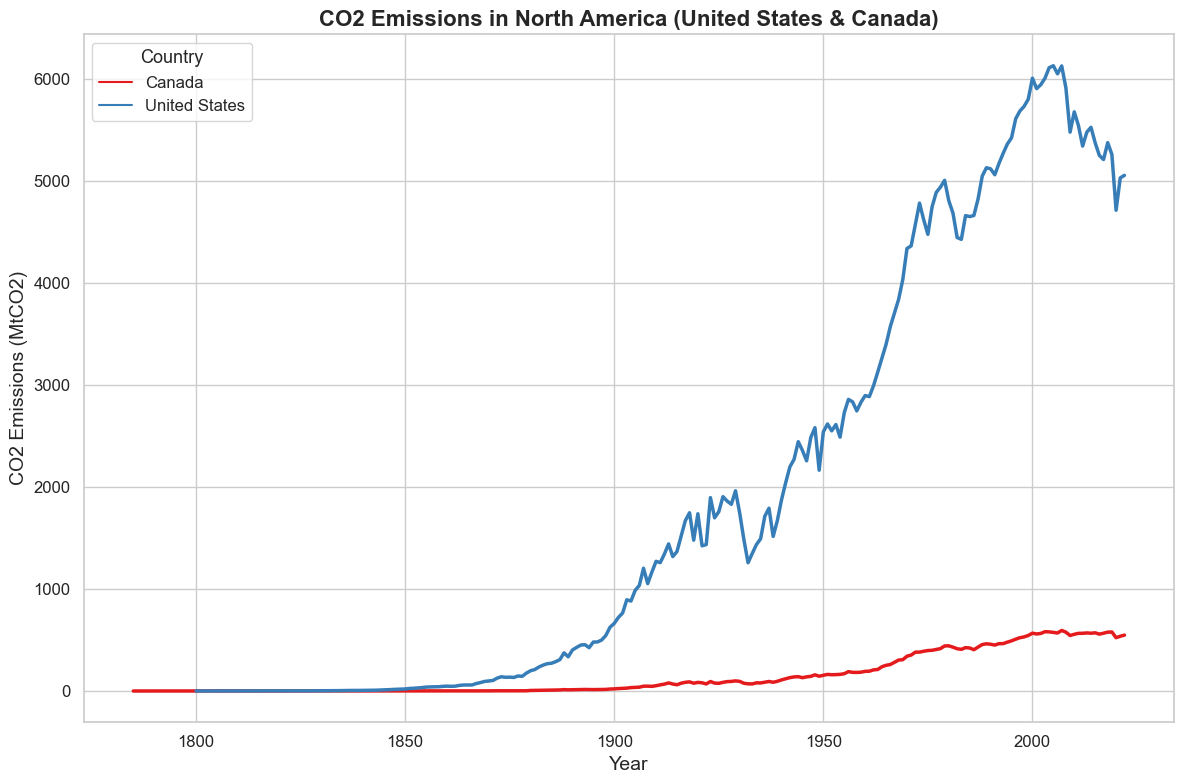

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
# Filter for US and Canada
north_america_df = df[df['country'].isin(['United States', 'Canada'])]

# Filter for columns 'country', 'year', and 'co2'
co2_df = north_america_df[['country', 'year', 'co2']]

# Set seaborn style
sns.set_theme(style='whitegrid')

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=co2_df, x='year', y='co2', hue='country', linewidth=2.5, palette='Set1')

# Adding labels, title, and improving aesthetics
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Emissions (MtCO2)', fontsize=14)
plt.title('CO2 Emissions in North America (United States & Canada)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Country', title_fontsize='13', fontsize='12')
plt.tight_layout()

# Show the plot
plt.show()


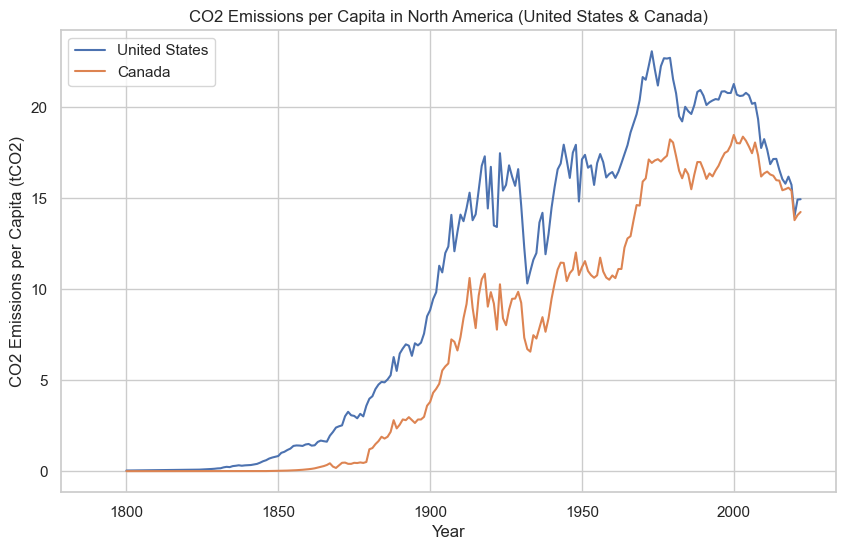

In [27]:
# Comparing CO2 Emissions per Capita
plt.figure(figsize=(10, 6))
for country in ['United States', 'Canada']:
    country_data = north_america_df[north_america_df['country'] == country]
    plt.plot(country_data['year'], country_data['co2_per_capita'], label=country)

plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita (tCO2)')
plt.title('CO2 Emissions per Capita in North America (United States & Canada)')
plt.legend()
plt.grid(True)
plt.show()

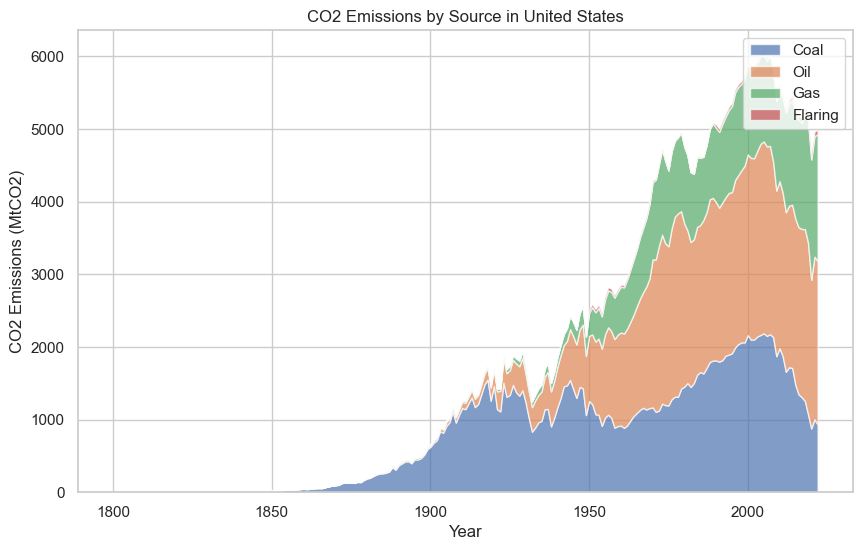

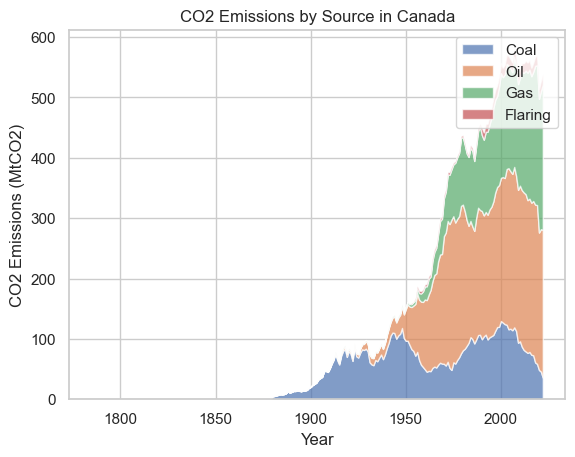

In [28]:
#Stacked Area Plot of CO2 by Source
# Filter for relevant columns
sources_df = north_america_df[['country', 'year', 'coal_co2', 'oil_co2', 'gas_co2', 'flaring_co2']]

# Create stacked area plot
plt.figure(figsize=(10, 6))
for country in ['United States', 'Canada']:
    country_data = sources_df[sources_df['country'] == country]
    plt.stackplot(country_data['year'], 
                  country_data[['coal_co2', 'oil_co2', 'gas_co2', 'flaring_co2']].T, 
                  labels=['Coal', 'Oil', 'Gas', 'Flaring'], alpha=0.7)
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (MtCO2)')
    plt.title(f'CO2 Emissions by Source in {country}')
    plt.legend()
    plt.show()


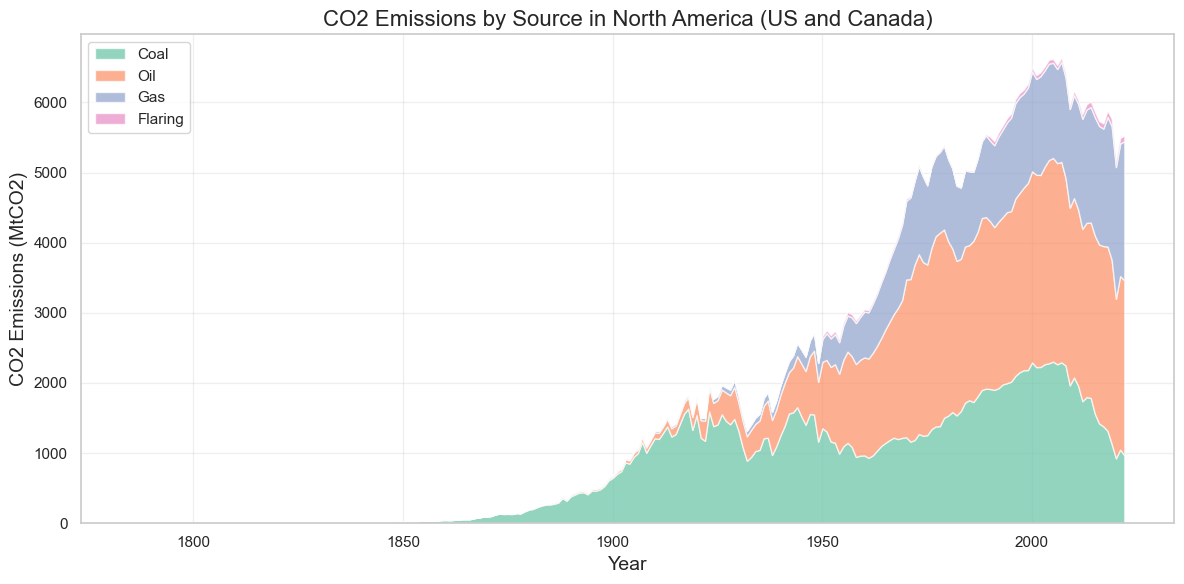

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'north_america_df' is your DataFrame containing CO2 emissions data

# Filter for relevant columns
sources_df = north_america_df[['country', 'year', 'coal_co2', 'oil_co2', 'gas_co2', 'flaring_co2']]

# Set up a color palette
colors = sns.color_palette("Set2", n_colors=4)  # Use Seaborn's Set2 palette

# Create a combined DataFrame for both countries
combined_data = sources_df.groupby(['year']).sum().reset_index()

# Create stacked area plot
plt.figure(figsize=(12, 6))

# Stackplot for both countries
plt.stackplot(combined_data['year'], 
               combined_data[['coal_co2', 'oil_co2', 'gas_co2', 'flaring_co2']].T, 
               labels=['Coal', 'Oil', 'Gas', 'Flaring'], 
               colors=colors, alpha=0.7)

# Customize the plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Emissions (MtCO2)', fontsize=14)
plt.title('CO2 Emissions by Source in North America (US and Canada)', fontsize=16)
plt.legend(loc='upper left')
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


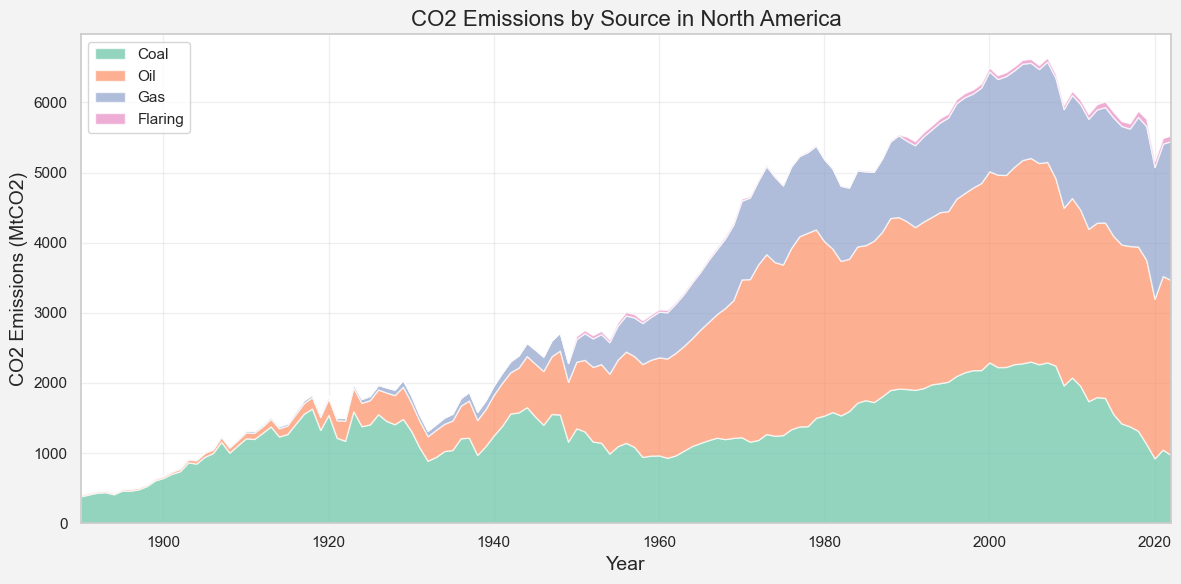

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'north_america_df' is your DataFrame containing CO2 emissions data

# Filter for relevant columns and start from the year 1890
sources_df = north_america_df[['country', 'year', 'coal_co2', 'oil_co2', 'gas_co2', 'flaring_co2']]
sources_df = sources_df[sources_df['year'] >= 1890]

# Set up a color palette
colors = sns.color_palette("Set2", n_colors=4)  # Using Seaborn's Set2 palette

# Create a combined DataFrame for both countries
combined_data = sources_df.groupby(['year']).sum().reset_index()

# Create stacked area plot
plt.figure(figsize=(12, 6))

# Stackplot for both countries
plt.stackplot(combined_data['year'], 
               combined_data[['coal_co2', 'oil_co2', 'gas_co2', 'flaring_co2']].T, 
               labels=['Coal', 'Oil', 'Gas', 'Flaring'], 
               colors=colors, alpha=0.7)

# Set background color to match the image
plt.gcf().set_facecolor('#F3F3F3')

# Customize the plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Emissions (MtCO2)', fontsize=14)
plt.title('CO2 Emissions by Source in North America', fontsize=16)

# Set x-axis limits from 1890 to 2022
plt.xlim(1890, 2022)

plt.legend(loc='upper left')
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()

# Save the plot as a JPG file
plt.savefig('co2_emissions_by_sources.jpg', format='jpg', dpi=500)
plt.show()


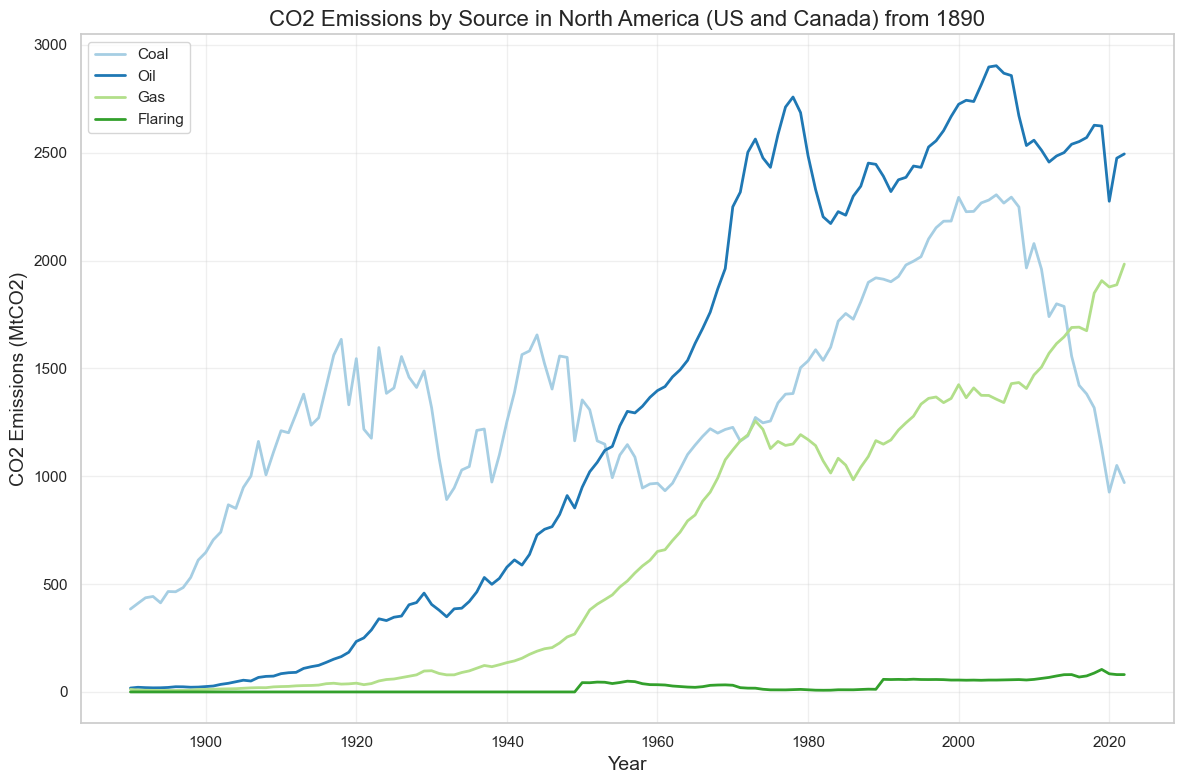

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'north_america_df' is your DataFrame containing CO2 emissions data

# Filter for relevant columns and start from the year 1890
sources_df = north_america_df[['country', 'year', 'coal_co2', 'oil_co2', 'gas_co2', 'flaring_co2']]
sources_df = sources_df[sources_df['year'] >= 1890]

# Set up a color palette
colors = sns.color_palette("Paired", n_colors=4)  # Using Seaborn's Paired palette

# Create a combined DataFrame for both countries
combined_data = sources_df.groupby(['year']).sum().reset_index()

# Create line plot
plt.figure(figsize=(12, 8))

# Plot each source of CO2 emissions
plt.plot(combined_data['year'], combined_data['coal_co2'], label='Coal', color=colors[0], linewidth=2)
plt.plot(combined_data['year'], combined_data['oil_co2'], label='Oil', color=colors[1], linewidth=2)
plt.plot(combined_data['year'], combined_data['gas_co2'], label='Gas', color=colors[2], linewidth=2)
plt.plot(combined_data['year'], combined_data['flaring_co2'], label='Flaring', color=colors[3], linewidth=2)

# Customize the plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Emissions (MtCO2)', fontsize=14)
plt.title('CO2 Emissions by Source in North America (US and Canada) from 1890', fontsize=16)
plt.legend(loc='upper left')
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


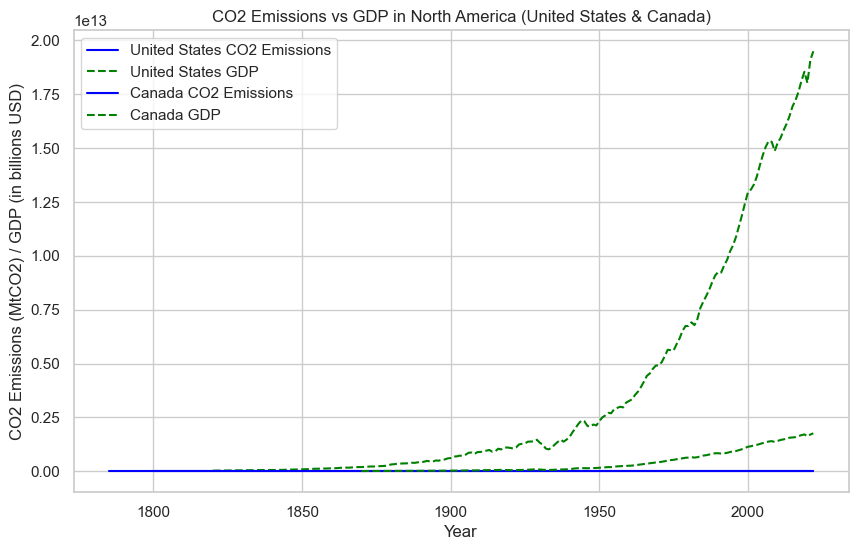

In [32]:
# CO2 Emissions vs GDP
plt.figure(figsize=(10, 6))
for country in ['United States', 'Canada']:
    country_data = north_america_df[north_america_df['country'] == country]
    plt.plot(country_data['year'], country_data['co2'], label=f'{country} CO2 Emissions', color='blue')
    plt.plot(country_data['year'], country_data['gdp'], label=f'{country} GDP', linestyle='--', color='green')

plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO2) / GDP (in billions USD)')
plt.title('CO2 Emissions vs GDP in North America (United States & Canada)')
plt.legend()
plt.grid(True)
plt.show()


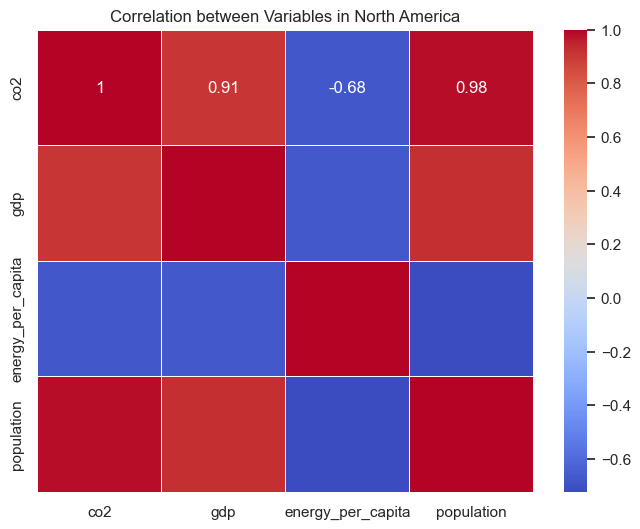

Top 5 features correlated with CO2 using Pearson correlation:
total_ghg_excluding_lucf       0.999719
total_ghg                      0.999123
consumption_co2                0.998316
primary_energy_consumption     0.995639
temperature_change_from_ch4    0.994139
dtype: float64

Top 5 features correlated with CO2 using Spearman correlation:
cumulative_coal_co2             0.996834
cumulative_co2_including_luc    0.995278
cumulative_co2                  0.994258
temperature_change_from_ghg     0.993003
temperature_change_from_co2     0.992766
dtype: float64

Top 5 features correlated with CO2 using Kendall correlation:
cumulative_coal_co2             0.961136
cumulative_co2_including_luc    0.948999
cumulative_co2                  0.945951
temperature_change_from_ghg     0.937340
temperature_change_from_co2     0.936627
dtype: float64


In [33]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = north_america_df[['co2', 'gdp', 'energy_per_capita', 'population']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Variables in North America')
plt.show()

# Prepare the data (assuming your DataFrame is called north_america_df)
numeric_features = north_america_df.select_dtypes(include=[np.number])  # Select numeric columns only

# Drop 'country', 'iso_code' or any non-numeric columns (done by selecting numeric features)
# Also, drop 'co2' from the DataFrame since we are finding features correlated with 'co2'
features = numeric_features.drop(columns=['co2'], errors='ignore')

# Calculate correlations of 'co2' with other features using different correlation methods
co2_corr_pearson = features.corrwith(numeric_features['co2'], method='pearson').sort_values(ascending=False)
co2_corr_spearman = features.corrwith(numeric_features['co2'], method='spearman').sort_values(ascending=False)
co2_corr_kendall = features.corrwith(numeric_features['co2'], method='kendall').sort_values(ascending=False)

# Find the top 5 correlated features for each correlation method
top_5_pearson = co2_corr_pearson.head(5)
top_5_spearman = co2_corr_spearman.head(5)
top_5_kendall = co2_corr_kendall.head(5)

# Display the results
print("Top 5 features correlated with CO2 using Pearson correlation:")
print(top_5_pearson)
print("\nTop 5 features correlated with CO2 using Spearman correlation:")
print(top_5_spearman)
print("\nTop 5 features correlated with CO2 using Kendall correlation:")
print(top_5_kendall)


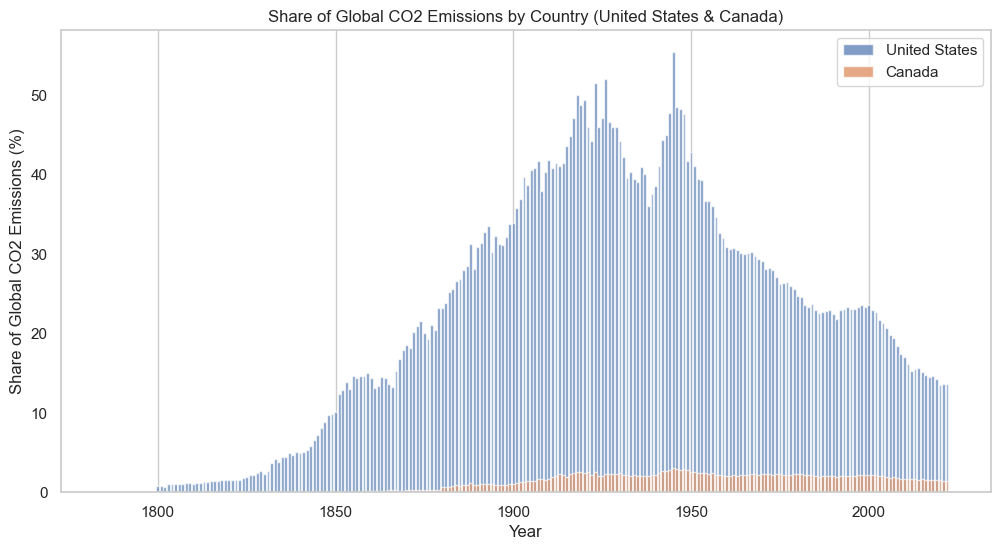

In [34]:
plt.figure(figsize=(12, 6))
for country in ['United States', 'Canada']:
    country_data = north_america_df[north_america_df['country'] == country]
    plt.bar(country_data['year'], country_data['share_global_co2'], label=country, alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Share of Global CO2 Emissions (%)')
plt.title('Share of Global CO2 Emissions by Country (United States & Canada)')
plt.legend()
plt.grid(axis='y')
plt.show()


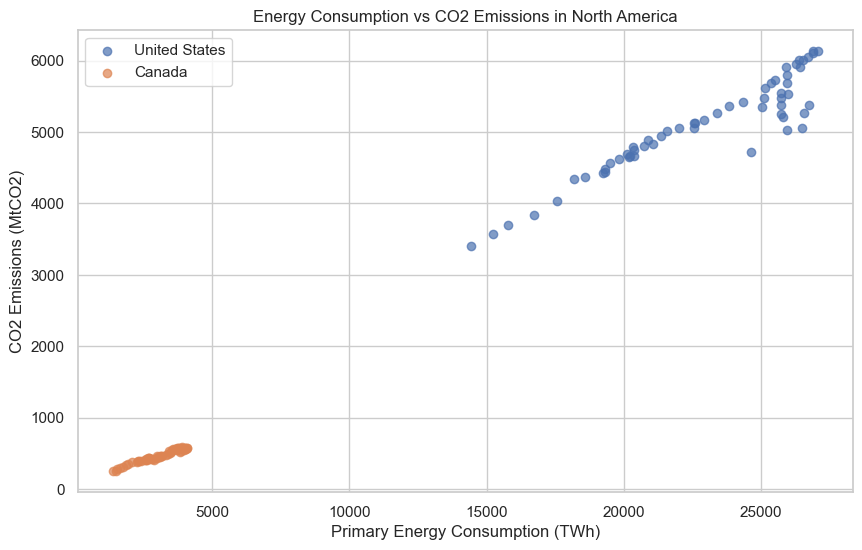

In [35]:
plt.figure(figsize=(10, 6))
for country in ['United States', 'Canada']:
    country_data = north_america_df[north_america_df['country'] == country]
    plt.scatter(country_data['primary_energy_consumption'], country_data['co2'], label=country, alpha=0.7)

plt.xlabel('Primary Energy Consumption (TWh)')
plt.ylabel('CO2 Emissions (MtCO2)')
plt.title('Energy Consumption vs CO2 Emissions in North America')
plt.legend()
plt.grid(True)
plt.show()


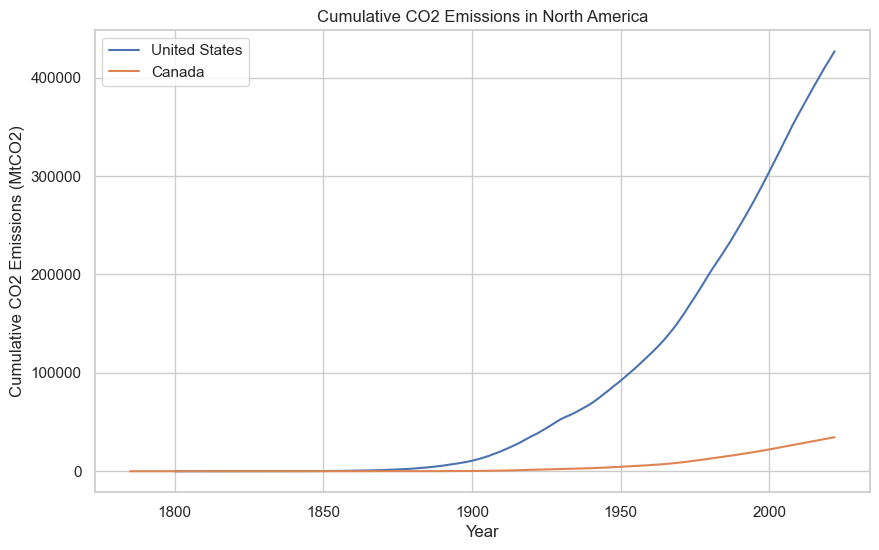

In [36]:
#Cumulative CO2 Emissions Comparison
plt.figure(figsize=(10, 6))
for country in ['United States', 'Canada']:
    country_data = north_america_df[north_america_df['country'] == country]
    plt.plot(country_data['year'], country_data['cumulative_co2'], label=country)

plt.xlabel('Year')
plt.ylabel('Cumulative CO2 Emissions (MtCO2)')
plt.title('Cumulative CO2 Emissions in North America')
plt.legend()
plt.grid(True)
plt.show()


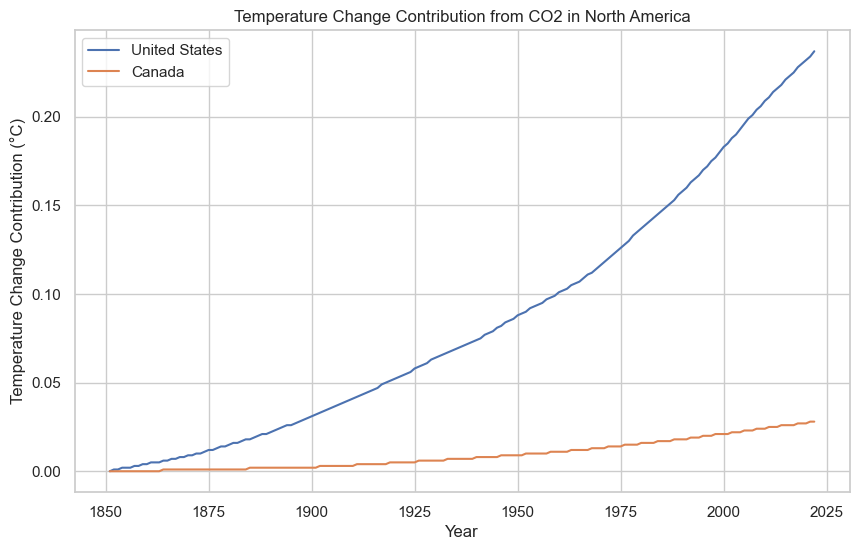

In [37]:
#Temperature Change Contribution
plt.figure(figsize=(10, 6))
for country in ['United States', 'Canada']:
    country_data = north_america_df[north_america_df['country'] == country]
    plt.plot(country_data['year'], country_data['temperature_change_from_co2'], label=country)

plt.xlabel('Year')
plt.ylabel('Temperature Change Contribution (°C)')
plt.title('Temperature Change Contribution from CO2 in North America')
plt.legend()
plt.grid(True)
plt.show()


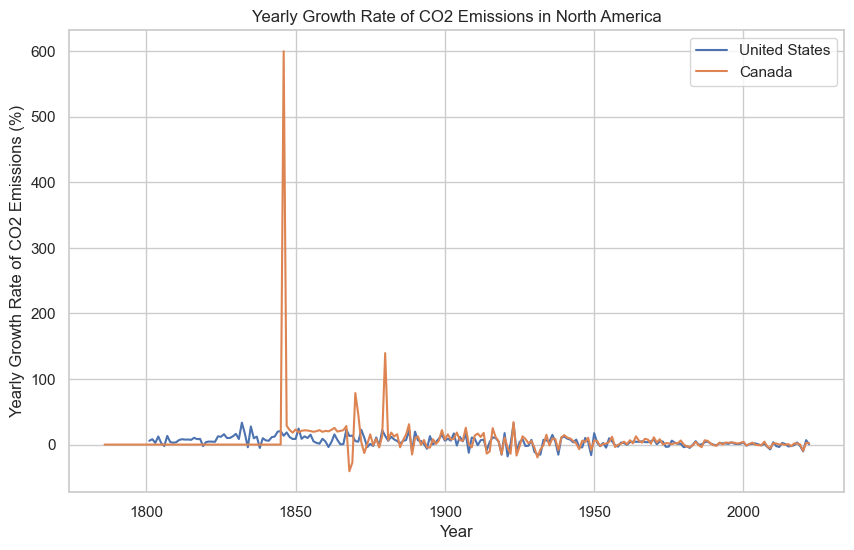

In [38]:
#Yearly Growth Rate of CO2 Emissions
plt.figure(figsize=(10, 6))
for country in ['United States', 'Canada']:
    country_data = north_america_df[north_america_df['country'] == country]
    plt.plot(country_data['year'], country_data['co2_growth_prct'], label=country)

plt.xlabel('Year')
plt.ylabel('Yearly Growth Rate of CO2 Emissions (%)')
plt.title('Yearly Growth Rate of CO2 Emissions in North America')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Sarupa\AppData\Local\Temp\ipykernel_13040\4250502713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_america_df['coal_share'] = north_america_df['coal_co2'] / north_america_df['co2']
C:\Users\Sarupa\AppData\Local\Temp\ipykernel_13040\4250502713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_america_df['oil_share'] = north_america_df['oil_co2'] / north_america_df['co2']
C:\Users\Sarupa\AppData\Local\Temp\ipykernel_13040\4250502713.py:5: SettingWithCopyWarning: 
A value is trying

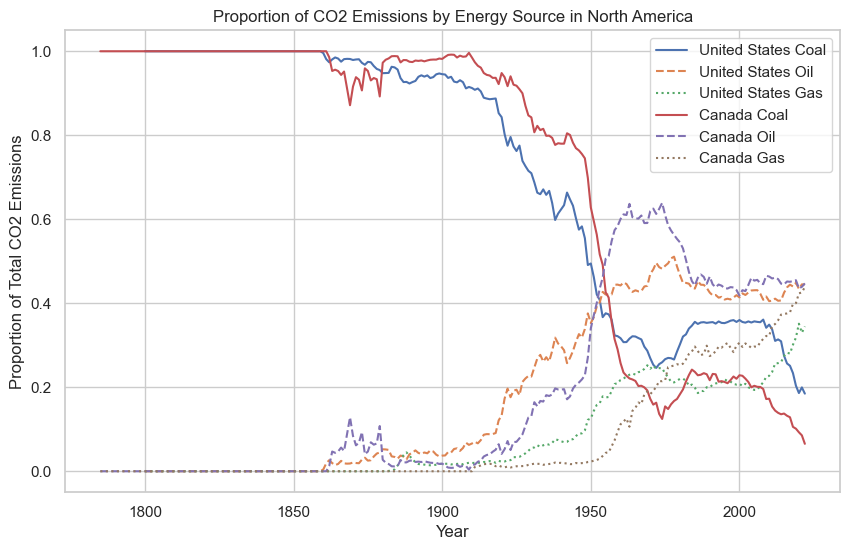

In [39]:
#CO2 Emissions by Energy Source over Time
# Calculate proportions of total CO2 from each energy source
north_america_df['coal_share'] = north_america_df['coal_co2'] / north_america_df['co2']
north_america_df['oil_share'] = north_america_df['oil_co2'] / north_america_df['co2']
north_america_df['gas_share'] = north_america_df['gas_co2'] / north_america_df['co2']

plt.figure(figsize=(10, 6))
for country in ['United States', 'Canada']:
    country_data = north_america_df[north_america_df['country'] == country]
    plt.plot(country_data['year'], country_data['coal_share'], label=f'{country} Coal')
    plt.plot(country_data['year'], country_data['oil_share'], linestyle='--', label=f'{country} Oil')
    plt.plot(country_data['year'], country_data['gas_share'], linestyle=':', label=f'{country} Gas')

plt.xlabel('Year')
plt.ylabel('Proportion of Total CO2 Emissions')
plt.title('Proportion of CO2 Emissions by Energy Source in North America')
plt.legend()
plt.grid(True)
plt.show()


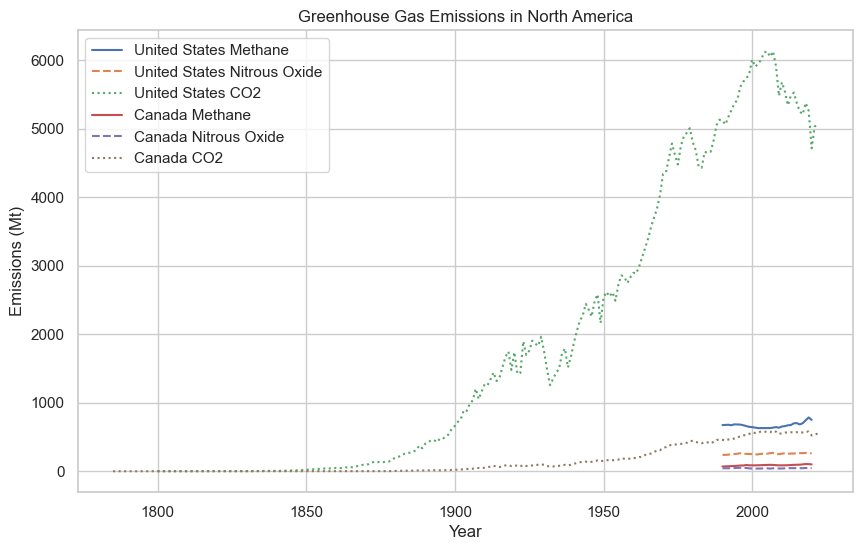

In [40]:
#Emissions Comparison by Greenhouse Gas Type
plt.figure(figsize=(10, 6))
for country in ['United States', 'Canada']:
    country_data = north_america_df[north_america_df['country'] == country]
    plt.plot(country_data['year'], country_data['methane'], label=f'{country} Methane')
    plt.plot(country_data['year'], country_data['nitrous_oxide'], linestyle='--', label=f'{country} Nitrous Oxide')
    plt.plot(country_data['year'], country_data['co2'], linestyle=':', label=f'{country} CO2')

plt.xlabel('Year')
plt.ylabel('Emissions (Mt)')
plt.title('Greenhouse Gas Emissions in North America')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Sarupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sarupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sarupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sarupa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

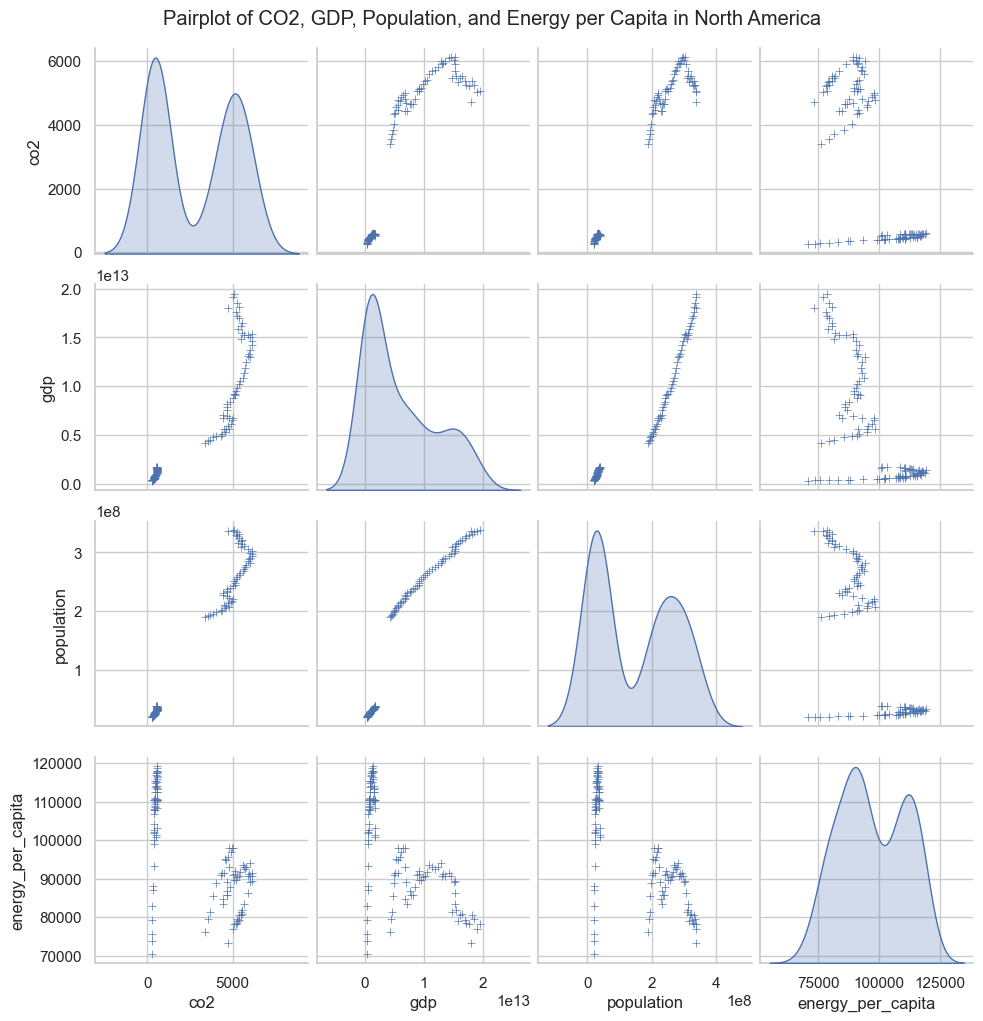

In [41]:
#Pairplot of Variables
sns.pairplot(north_america_df[['co2', 'gdp', 'population', 'energy_per_capita']].dropna(), diag_kind='kde', markers='+')
plt.suptitle('Pairplot of CO2, GDP, Population, and Energy per Capita in North America', y=1.02)
plt.show()


## Subsection 1.11: Why time series model is use for prediction

Description: Initial analysis to see the time series properties such as auto correlation and cross correlation

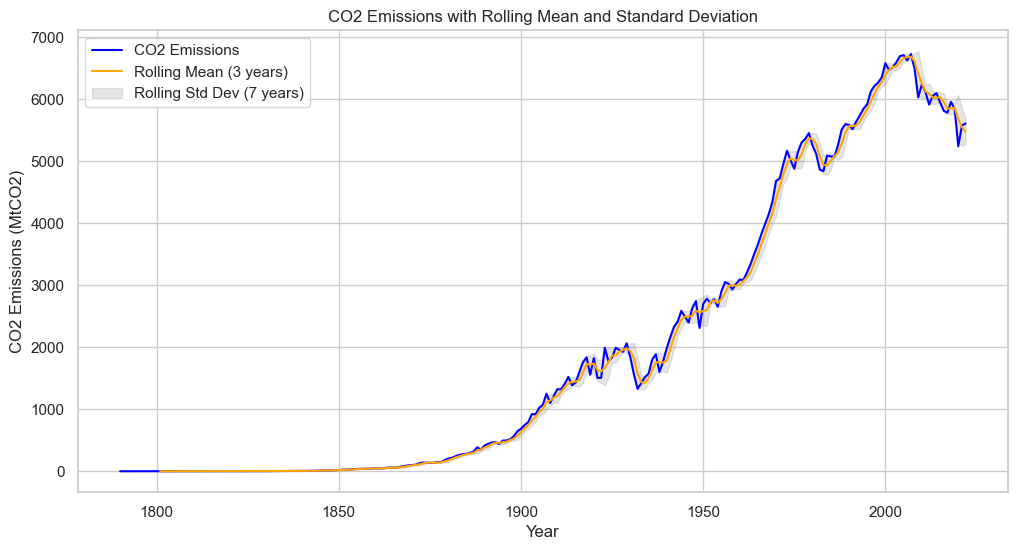

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler

# Prepare the data (assuming your DataFrame is called north_america_df)
north_america_data = north_america_df[['year', 'country', 'co2', 'gdp', 'population']]
north_america_data = north_america_data.groupby('year').sum()  # Sum CO2, GDP, and population for North America
north_america_data['gdp_per_capita'] = north_america_data['gdp'] / north_america_data['population']

# Remove rows with NaN or inf values in CO2, GDP, or Population
north_america_data = north_america_data.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate rolling mean and rolling standard deviation
rolling_mean = north_america_data['co2'].rolling(window=3).mean()
rolling_std = north_america_data['co2'].rolling(window=3).std()
# Plotting CO2 emissions with rolling mean and standard deviation
plt.figure(figsize=(12, 6))
plt.plot(north_america_data.index, north_america_data['co2'], label='CO2 Emissions', color='blue')
plt.plot(north_america_data.index, rolling_mean, label='Rolling Mean (3 years)', color='orange')
plt.fill_between(north_america_data.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='gray', alpha=0.2, label='Rolling Std Dev (7 years)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO2)')
plt.title('CO2 Emissions with Rolling Mean and Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
from statsmodels.tsa.stattools import adfuller


# Perform Augmented Dickey-Fuller test
result = adfuller(north_america_data['co2'], autolag='AIC')

# Display the results
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
num_obs = result[3]
critical_values = result[4]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Used Lag:", used_lag)
print("Number of Observations Used:", num_obs)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")

# Interpretation
if p_value < 0.05:
    print("The series is stationary (reject null hypothesis).")
else:
    print("The series is non-stationary (fail to reject null hypothesis).")


ADF Statistic: -0.2599994062547309
p-value: 0.9309816563422447
Used Lag: 12
Number of Observations Used: 211
Critical Values:
  1%: -3.46172743446274
  5%: -2.8753374677799957
  10%: -2.574124089081557
The series is non-stationary (fail to reject null hypothesis).


<Figure size 1200x600 with 0 Axes>

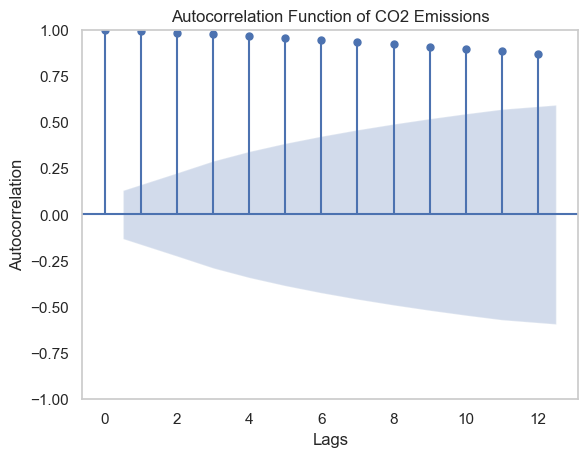

Three Year Lag Autocorrelation:  0.9956944860235071
Six Year Lag Autocorrelation:  0.9894796789430647
Nine Year Lag Autocorrelation:  0.9815255283238798


In [44]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf


# Check if 'co2' column exists
if 'co2' in north_america_data.columns:
    # Plot ACF for CO2 emissions for lags up to 12
    plt.figure(figsize=(12, 6))
    plot_acf(north_america_data['co2'], lags=12, alpha=0.05)
    plt.title('Autocorrelation Function of CO2 Emissions')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.grid()
    plt.show()
else:
    print("CO2 column is not present in the DataFrame.")

# Calculate autocorrelation for specified lags
autocorrelation_lag3 = north_america_data['co2'].autocorr(lag=3)
print("Three Year Lag Autocorrelation: ", autocorrelation_lag3)

autocorrelation_lag6 = north_america_data['co2'].autocorr(lag=6)
print("Six Year Lag Autocorrelation: ", autocorrelation_lag6)

autocorrelation_lag9 = north_america_data['co2'].autocorr(lag=9)
print("Nine Year Lag Autocorrelation: ", autocorrelation_lag9)

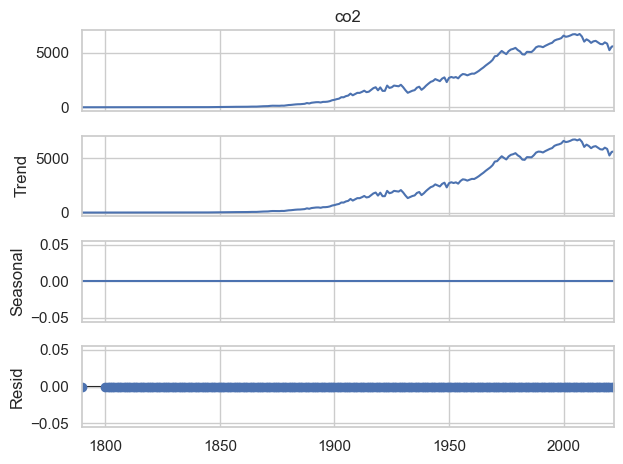

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition
# Adjust period based on the frequency of your data, e.g., for monthly data use period=12
decompose = seasonal_decompose(north_america_data['co2'], model='additive', period=1)  # Assuming yearly data

# Plot the decomposition
decompose.plot()
plt.show()